# De Werf/Diep/Jamieson Human Pediatric AML Study in Progenitors and Hematopoietic Stem Cells 
### Progenitors
* Pediatric AML vs Adult AML
* Pediatric AML vs Pediatric Non-leukemia

### Stem Cells
* Pediatric AML vs Adult AML
* Pediatric AML vs Pediatric Non-leukemia

### Pediatric AML
* Progenitors vs Stem Cells

### Adult AML
* Progenitors vs Stem Cells


# RNASeq Enrichment Analyses

   > * Tom Whisenant, CCBB (twhisenant@ucsd.edu)
   > * Based on upstream analysis by Guorong Xu, CCBB (g1xu@ucsd.edu)
</div>


* Modeled on "RNA-seq analysis is easy as 1-2-3 with limma, Glimma and edgeR" ([1](#Citations))

## Table of Contents
* [Introduction](#Introduction)
* [Parameter Input](#Parameter-Input)
* [Library Import](#Library-Import)
* [Enrichment Tool Set-Up](#Enrichment-Tool-Set-Up)
* [Enrichment Analysis Background](#Enrichment-Analysis-Background)
* [Enrichment Tool Set-Up](#Enrichment-Tool-Set-Up)
    * [WebGestalt](#WebGestalt)
    * [Pathview](#Pathview)
    * [Signaling Pathway Impact Analysis](#SPIA)
    * [Gene Set Variation Analysis](#GSVA)
* [Examination of Individual Comparisons](#Examination-of-Individual-Comparisons)

   > * [Progenitors_PedAMLvsAdultAML](#Progenitors_PedAMLvsAdultAML)
   > * [Progenitors_PedAMLvsPedNL](#Progenitors_PedAMLvsPedNL)
   > * [Stem_PedAMLvsAdultAML](#Stem_PedAMLvsAdultAML)
   > * [Stem_PedAMLvsPedNL](#Stem_PedAMLvsPedNL)
   > * [PedAML_ProgenitorsvsStem](#PedAML_ProgenitorsvsStem)
   > * [AdultAML_ProgenitorsvsStem](#AdultAML_ProgenitorsvsStem)

* [Understanding the Output](#Understanding-the-Output)
* [Summary](#Summary)
* [Citations](#Citations)
* [Appendix: R Session Info](#Appendix:-R-Session-Info)


## Introduction

This notebook takes in RNASeq data prepared by the previous notebook, "RNASeq_Differential_Expression_Testing", and uses the WebGestalt ([2](#Citations)) R ([3](#Citations)) package to test for enrichment of differentially expressed genes in annotated functions, pathways, and diseases.  It also uses the PathView [(4)](#Citations) BioConductor [(5)](#Citations) tool to color KEGG [(6)](#Citations) pathways by differential expression findings.

[Table of Contents](#Table-of-Contents)

## Parameter Input

In [1]:
gPreviousStepRdataFp = "../interim/20200228_DeWerf_Human_PediatricAML_differential_expression_20200327163122.RData"

In [5]:
gSourceDir = "src/" # note trailing slash here but not below
# Import shared source code to load and save previous notebooks' environments:
source(paste0(gSourceDir, "ChainedNotebookSupport.R"))
# Import the previous step's state:
#gPreviousStepEnv = loadToEnvironment(gPreviousStepRdataFp)
load(gPreviousStepRdataFp)

In [6]:
ls(globalenv())
ls(gPreviousStepEnv)
#for(n in ls(gPreviousStepEnv)) print(ls(pattern=n))

[1] "CD38.lcpm"                                                     
  [2] "CD38.lcpm.prog"                                                
  [3] "CD38.lcpm.stem"                                                
  [4] "composeFileNameForCoefficient"                                 
  [5] "composeFileNameForHeatmap"                                     
  [6] "corfit"                                                        
  [7] "doAndPrintScaledPcaOnSamplesAsRowsDf"                          
  [8] "doPcaFromSamplesAsColsDf"                                      
  [9] "doPowerCalculation"                                            
 [10] "doScaledPcaOnSamplesAsRowsDf"                                  
 [11] "expandDesignDf"                                                
 [12] "expandPlot"                                                    
 [13] "findPlotAspectRatio"                                           
 [14] "gAllGenesDesc"                                                 
 [15] "gBcv"                                                          
 [16] "gBcv.prog"                                                     
 [17] "gBcv.stem"                                                     
 [18] "gCommonDispersion"                                             
 [19] "gCommonDispersion.prog"                                        
 [20] "gCommonDispersion.stem"                                        
 [21] "gContrastMatrix"                                               
 [22] "gContrastMatrix.paired"                                        
 [23] "gContrastMatrix.paired.nocor"                                  
 [24] "gContrastMatrix.prog"                                          
 [25] "gContrastMatrix.stem"                                          
 [26] "gDefaultHeight"                                                
 [27] "gDefaultWidth"                                                 
 [28] "gDesignModel"                                                  
 [29] "gDesignModel.paired"                                           
 [30] "gDesignModel.paired.nocor"                                     
 [31] "gDesignModel.prog"                                             
 [32] "gDesignModel.stem"                                             
 [33] "gDgeList"                                                      
 [34] "gene.uni"                                                      
 [35] "generateGroupMeansDesignModel"                                 
 [36] "generateGroupMeansDesignModel2"                                
 [37] "generateGroupMeansDesignModel3"                                
 [38] "getCpmsDf"                                                     
 [39] "getHotellingT2Ellipse"                                         
 [40] "getHotellingT2EllipseCenterAndRadii"                           
 [41] "getNumSamplesInGroup"                                          
 [42] "getWhetherPointsAreOutliers"                                   
 [43] "gGeneIdCol"                                                    
 [44] "gGeneType"                                                     
 [45] "gGroupMetadataColName1"                                        
 [46] "gGroupMetadataColName2"                                        
 [47] "gGroupMetadataVector.paired"                                   
 [48] "gGroupMetadataVector.prog"                                     
 [49] "gGroupMetadataVector.stem"                                     
 [50] "gHeatmapDesc"                                                  
 [51] "gInterimDir"                                                   
 [52] "globalDoPowerCalculation"                                      
 [53] "globalPlotAndSaveComparisonsVenn"                              
 [54] "globalPlotTopHeatmapForCoefficient"                            
 [55] "globalSummarizeTestsAndPlotMdForCoefficient"                   
 [56] "gLogThresholdedTestResults"                                    
 [57] "gLogThresholdedTest

[1] "doAndPrintScaledPcaOnSamplesAsRowsDf"    
 [2] "doPcaFromSamplesAsColsDf"                
 [3] "doScaledPcaOnSamplesAsRowsDf"            
 [4] "expandDesignDf"                          
 [5] "expandPlot"                              
 [6] "filterDgeListByCpmThresholdForNumSamples"
 [7] "findPlotAspectRatio"                     
 [8] "gDgeList"                                
 [9] "gDgeList.prog"                           
[10] "gDgeList.stem"                           
[11] "getCpmsDf"                               
[12] "getHotellingT2Ellipse"                   
[13] "getHotellingT2EllipseCenterAndRadii"     
[14] "getWhetherPointsAreOutliers"             
[15] "gFilteredDgeList"                        
[16] "gFilteredDgeList.prog"                   
[17] "gFilteredDgeList.stem"                   
[18] "gGeneIdCol"                              
[19] "gGeneType"                               
[20] "gInterimDir"                             
[21] "gMinExclusiveCpms"                       
[22] "gMinInclusiveNumSamples"                 
[23] "gNonOutliersMask"                        
[24] "gNonOutliersMask.prog"                   
[25] "gNonOutliersMask.stem"                   
[26] "gNonOutliersMask2"                       
[27] "gNonOutliersMask2.stem"                  
[28] "gNormedFilteredDgeList"                  
[29] "gNormedFilteredDgeList.prog"             
[30] "gNormedFilteredDgeList.stem"             
[31] "gOrigFilteredDgeList"                    
[32] "gOrigFilteredDgeList.prog"               
[33] "gOrigFilteredDgeList.stem"               
[34] "gOrigNormedFilteredDgeList"              
[35] "gOrigNormedFilteredDgeList.prog"         
[36] "gOrigNormedFilteredDgeList.stem"         
[37] "gOutputDir"                              
[38] "gPreviousStepEnv"                        
[39] "gPreviousStepRdataFp"                    
[40] "gProjectName"                            
[41] "gRunName"                                
[42] "gSampleColName"                          
[43] "gSourceDir"                              
[44] "isPointOutsideEllipse"                   
[45] "loadToEnvironment"                       
[46] "make2dPcaPlot"                           
[47] "makeAndPrintCpmsPca"                     
[48] "makeAndPrintPca"                         
[49] "makeAndPrintPcaPlot"                     
[50] "makeAndPrintRawCountsPca"                
[51] "makeNormalizedPca"                       
[52] "makeRunName"                             
[53] "mask.len"                                
[54] "mask.len.stem"                           
[55] "plotLogCpmDensityPrePostFiltering"       
[56] "plotMdsColoredByColumn"                  
[57] "printPlotInViewport"                     
[58] "reformatDfForPca"                        
[59] "syncCountSampleOrderToDesignDf"          
[60] "writeWorkspaceImage"

In [7]:
# Load relevant variables:
gProjectName = gPreviousStepEnv$gProjectName
gInterimDir = gPreviousStepEnv$gInterimDir
gOutputDir = gPreviousStepEnv$gOutputDir
gDgeList = gPreviousStepEnv$gDgeList
gGeneType = gPreviousStepEnv$gGeneType
gGeneIdCol = gPreviousStepEnv$gGeneIdCol
copyEnv <- function(from, to, names=ls(from, all.names=TRUE)) {
  mapply(assign, names, mget(names, from), list(to), 
         SIMPLIFY = FALSE, USE.NAMES = FALSE)
  invisible(NULL)
}
copyEnv(gPreviousStepEnv, globalenv())
ls()

[1] "CD38.lcpm"                                                     
  [2] "CD38.lcpm.prog"                                                
  [3] "CD38.lcpm.stem"                                                
  [4] "composeFileNameForCoefficient"                                 
  [5] "composeFileNameForHeatmap"                                     
  [6] "copyEnv"                                                       
  [7] "corfit"                                                        
  [8] "doAndPrintScaledPcaOnSamplesAsRowsDf"                          
  [9] "doPcaFromSamplesAsColsDf"                                      
 [10] "doPowerCalculation"                                            
 [11] "doScaledPcaOnSamplesAsRowsDf"                                  
 [12] "expandDesignDf"                                                
 [13] "expandPlot"                                                    
 [14] "filterDgeListByCpmThresholdForNumSamples"                      
 [15] "findPlotAspectRatio"                                           
 [16] "gAllGenesDesc"                                                 
 [17] "gBcv"                                                          
 [18] "gBcv.prog"                                                     
 [19] "gBcv.stem"                                                     
 [20] "gCommonDispersion"                                             
 [21] "gCommonDispersion.prog"                                        
 [22] "gCommonDispersion.stem"                                        
 [23] "gContrastMatrix"                                               
 [24] "gContrastMatrix.paired"                                        
 [25] "gContrastMatrix.paired.nocor"                                  
 [26] "gContrastMatrix.prog"                                          
 [27] "gContrastMatrix.stem"                                          
 [28] "gDefaultHeight"                                                
 [29] "gDefaultWidth"                                                 
 [30] "gDesignModel"                                                  
 [31] "gDesignModel.paired"                                           
 [32] "gDesignModel.paired.nocor"                                     
 [33] "gDesignModel.prog"                                             
 [34] "gDesignModel.stem"                                             
 [35] "gDgeList"                                                      
 [36] "gDgeList.prog"                                                 
 [37] "gDgeList.stem"                                                 
 [38] "gene.uni"                                                      
 [39] "generateGroupMeansDesignModel"                                 
 [40] "generateGroupMeansDesignModel2"                                
 [41] "generateGroupMeansDesignModel3"                                
 [42] "getCpmsDf"                                                     
 [43] "getHotellingT2Ellipse"                                         
 [44] "getHotellingT2EllipseCenterAndRadii"                           
 [45] "getNumSamplesInGroup"                                          
 [46] "getWhetherPointsAreOutliers"                                   
 [47] "gFilteredDgeList"                                              
 [48] "gFilteredDgeList.prog"                                         
 [49] "gFilteredDgeList.stem"                                         
 [50] "gGeneIdCol"                                                    
 [51] "gGeneType"                                                     
 [52] "gGroupMetadataColName1"                                        
 [53] "gGroupMetadataColName2"                                        
 [54] "gGroupMetadataVector.paired"                                   
 [55] "gGroupMetadataVector.prog"                                     
 [56] "gGroupMetadataVector.stem"                                     
 [57] "gHeatmapDesc"      

Populate the run name parameter automatically to ensure that outputs from different runs do not overwrite each other:

In [8]:
gRunName = makeRunName(gProjectName, "enrichment_analyses")
gRunName

[1] "20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20221012225600"

[Table of Contents](#Table-of-Contents)

## Library Import

Import the necessary R libraries for the analysis:

In [5]:
#install.packages("WebGestaltR")

In [6]:
#if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")

In [7]:
#BiocManager::install("pathview", version = "3.8")

In [8]:
#BiocManager::install("SPIA", version = "3.8")

In [9]:
#BiocManager::install("GSVA", version = "3.8")
#BiocManager::install("GSEABase", version = "3.8")
#BiocManager::install("GSVAdata", version = "3.8")
#BiocManager::install("Biobase", version = "3.8")
#BiocManager::install("genefilter", version = "3.8")

In [8]:
library(limma)

In [9]:
library(WebGestaltR)

******************************************

*                                        *

*          Welcome to WebGestaltR !      *

*                                        *

******************************************



In [10]:
library(pathview)

Loading required package: org.Hs.eg.db
Loading required package: AnnotationDbi
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from ‘package:limma’:

    plotMA

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sap

ERROR: Error: package or namespace load failed for ‘pathview’:
 .onLoad failed in loadNamespace() for 'pathview', details:
  call: gzfile(file, mode)
  error: cannot open the connection


In [19]:
library(SPIA)

Loading required package: KEGGgraph

Attaching package: ‘KEGGgraph’

The following object is masked from ‘package:graphics’:

    plot



In [20]:
library(GSVA)
library(GSEABase)
library(GSVAdata)
library(Biobase)
library(genefilter)
data(c2BroadSets)

Loading required package: annotate
Loading required package: XML
Loading required package: graph

Attaching package: ‘graph’

The following object is masked from ‘package:XML’:

    addNode

Loading required package: hgu95a.db



In [9]:
library(gprofiler2)
library(fgsea)
library(GSA)
library(msigdbr)
library(ggplot2)

Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


In [22]:
data(c2BroadSets)

In [23]:
# This line prevents SVG output, which interacts badly with export to HTML
options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))

## Enrichment Analysis Background

"Enrichment analysis" is an umbrella term for a class of analyses that investigate whether a gene set of interest (usually those found to be significant in an upstream analysis such as differential expression testing) are found to be "enriched" an annotated gene set (such as the set of genes in a particular pathway).  Enrichment can be determined in a number of different ways, with the most common being over-representation analysis (ORA) and gene set enrichment analysis (GSEA).  

Over-representation analysis simply compares gene lists, determining whether the genes in the gene set of interest are present in the annotated gene set in a significantly higher number (or a significantly lower number) than one would statistically expect by chance given the size and content of the two sets and the reference set from which they are drawn.  In this sort of analyis, the statistical validity of the outcome depends critically on the choice of correct reference set, which represents the set of genes from which the genes of interest can be drawn; while it is easy (and tempting) to use all the genes in the organism being examined as the reference set, this is almost certainly an over-estimate--which will lead to over-estimates of the significance of any enrichment found--and thus should be replaced with a more realistic number such as the number of genes actually detectable in the RNASeq experiment.

Conversely, gene set enrichment analysis makes use of not only the identities of the genes of interest but also their scores (such their differential expression fold-changes): the genes of interest are ranked by their scores, and the GSEA algorithm ([7](#Citations)) determines whether the subset of genes of interest that are also part of the chosen annotated set (e.g., a particular pathway) are localized toward the top or the bottom of this ranked list.  For example, if genes from a particular pathway are found to lie preferentially near the top of a list of genes differentially expressed in treatment versus control that has been ranked by decreasing fold-change, then this suggests that this pathway is UP-regulated in the treatment compared to the control.

Enrichment analyses such as ORA and GSEA can be performed using a wide range of different annotated sets. The most commonly used is the Gene Ontology (GO; [8](#Citation)), in which case the resulting analysis is often referred to as a "functional enrichment analysis" since it examines the enrichment of particular biological functions (as annotated in the GO) in the gene set of interest.  As discussed earlier, enrichment analysis can also be performed using pathways (from sources such as KEGG ([6](#Citation)) as the annotated gene set, in which case it may be called "pathway enrichment analysis".

## Enrichment Tool Set-Up

### WebGestalt  

While a large number of different enrichment analysis tools and techniques exist, we choose to use the WebGestalt package, which offers both ORA and GSEA algorithms and provides built-in access to a large number of annotated gene sets of interest.

Liao, Y., Wang, J., Jaehnig, E., Shi, Z., Zhang, B. WebGestalt 2019: gene set analysis toolkit with revamped UIs and APIs, Nucleic Acids Research, gkz401

In [14]:
# organism must be one of the following set:
# athaliana
# btaurus
# celegans
# cfamiliaris
# dmelanogaster
# drerio
# ggallus
# hsapiens
# mmusculus
# rnorvegicus
# scerevisiae
# sscrofa
# others

gWebgestaltOrganism = "hsapiens"

WebGestalt offers a large variety of annotated dataset resources, grouped into 9 categories: geneontology, pathway, network, disease, drug, phenotype, chromosomalLocation, community-contributed, and other.  The resources available differ depending on the organism to be analyzed.  View the full list of resources available for the organism of interest:

In [15]:
listGeneSet(organism=gWebgestaltOrganism,hostName="http://www.webgestalt.org/")

name                                           
1  geneontology_Biological_Process                
2  geneontology_Biological_Process_noRedundant    
3  geneontology_Cellular_Component                
4  geneontology_Cellular_Component_noRedundant    
5  geneontology_Molecular_Function                
6  geneontology_Molecular_Function_noRedundant    
7  pathway_KEGG                                   
8  pathway_Panther                                
9  pathway_Reactome                               
10 pathway_Wikipathway                            
11 pathway_Wikipathway_cancer                     
12 network_CORUM                                  
13 network_CPTAC_Proteomics_BRCA                  
14 network_CPTAC_Proteomics_COADREAD              
15 network_CPTAC_Proteomics_OV                    
16 network_Kinase_phosphosite                     
17 network_Kinase_target                          
18 network_PPI_BIOGRID                            
19 network_PTMsigDB                               
20 network_TCGA_RNASeq_ACC                        
21 network_TCGA_RNASeq_BLCA                       
22 network_TCGA_RNASeq_BRCA                       
23 network_TCGA_RNASeq_CESC                       
24 network_TCGA_RNASeq_CHOL                       
25 network_TCGA_RNASeq_COADREAD                   
26 network_TCGA_RNASeq_DLBC                       
27 network_TCGA_RNASeq_ESCA                       
28 network_TCGA_RNASeq_GBM                        
29 network_TCGA_RNASeq_GBMLGG                     
30 network_TCGA_RNASeq_HNSC                       
⋮  ⋮                                              
35 network_TCGA_RNASeq_LIHC                       
36 network_TCGA_RNASeq_LUAD                       
37 network_TCGA_RNASeq_LUSC                       
38 network_TCGA_RNASeq_MESO                       
39 network_TCGA_RNASeq_OV                         
40 network_TCGA_RNASeq_PAAD                       
41 network_TCGA_RNASeq_PCPG                       
42 network_TCGA_RNASeq_PRAD                       
43 network_TCGA_RNASeq_SARC                       
44 network_TCGA_RNASeq_SKCM                       
45 network_TCGA_RNASeq_STAD                       
46 network_TCGA_RNASeq_STES                       
47 network_TCGA_RNASeq_TGCT                       
48 network_TCGA_RNASeq_THCA                       
49 network_TCGA_RNASeq_THYM                       
50 network_TCGA_RNASeq_UCEC                       
51 network_TCGA_RNASeq_UCS                        
52 network_TCGA_RNASeq_UVM                        
53 network_Transcription_Factor_target            
54 network_miRNA_target                           
55 disease_Disgenet                               
56 disease_GLAD4U                                 
57 disease_OMIM                                   
58 drug_DrugBank                                  
59 drug_GLAD4U                                    
60 phenotype_Human_Phenotype_Ontology             
61 chromosomalLocation_CytogeneticBand            
62 community-contributed_5htGeneSets_Conte        
63 community-contributed_Hallmark50               
64 community-contributed_MuscleGeneSets_Duddy_2017
   description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
1  The gene ontology biological process database was downloaded from http://www.geneontology.org/.                                                                                                                                                                                                                                         

> We choose to examine the Biological Process and Molecular Function domains of the Gene Ontology, as well as four pathway sets (KEGG, Panther, Reactome, and Wikipathway), four networks (kinase targets, miRNA targets, PPI BioGRID, and transcription factor targets), two disease sets (Disgenet and OMIM), DrugBank, and the Human Phenotype Ontology.  These will give us a broad overview of the involvement of the genes of interest in a wide variety of domains.

In [16]:
gWebgestaltDbs = c("geneontology_Biological_Process","geneontology_Molecular_Function","geneontology_Biological_Process_noRedundant",
                   "pathway_KEGG","pathway_Panther","pathway_Reactome","pathway_Wikipathway","network_Kinase_target",
                   "network_miRNA_target","network_PPI_BIOGRID","network_Transcription_Factor_target",
                   "disease_Disgenet", "disease_OMIM", "drug_DrugBank", "phenotype_Human_Phenotype_Ontology",
                   "network_TCGA_RNASeq_LAML")

In [17]:
runWebgestaltOra = function(organism, runName, outputDirectory, databases, fit, coefficientName, maxAdjPVal=0.05, fdrthr=0.05){
    tryCatch({
        top <- topTreat(fit, coef=coefficientName, n=Inf, sort.by='p')
        top$ENTREZ<-unlist(as.list(top$ENTREZID))
        top<-top[!is.na(top$ENTREZ),]
        top<-top[!duplicated(top$ENTREZ),]
        tg1<-top[top$adj.P.Val<maxAdjPVal,]

        DE_genes=tg1$ENTREZ
        ALL_genes=top$ENTREZ
        interestGeneFile = file.path(outputDirectory, sprintf('%s_DE_Genes_Webgestalt_ORA_input_%s.txt', runName, coefficientName))
        referenceGeneFile = file.path(outputDirectory, sprintf('%s_ReferenceGenes_Webgestalt_ORA_%s.txt', runName, coefficientName))
        write.table(DE_genes, interestGeneFile, sep='\t', row.names=F, col.names=F, quote=FALSE)
        write.table(ALL_genes, referenceGeneFile, sep='\t',row.names=F, col.names=F, quote=FALSE)

        for (database in databases){
            enrichResult <-WebGestaltR(enrichMethod='ORA', 
                                       organism=organism,
                                       enrichDatabase=database,
                                       interestGeneFile=interestGeneFile,
                                       interestGeneType='entrezgene',
                                       referenceGeneFile=referenceGeneFile,
                                       referenceGeneType='entrezgene',
                                       isOutput=TRUE,
                                       outputDirectory=outputDirectory,
                                       fdrThr=fdrthr,
                                       projectName=sprintf('%s_Webgestalt_ORA_%s_%s', runName, coefficientName, database))
        }
    }, error=function(e){print(paste0("WebGestaltR ORA failed for maxAdjPval <",maxAdjPVal," with message:", e))})
}

runWebgestaltGsea = function(organism, runName, outputDirectory, databases, fit, coefficientName, maxAdjPVal=0.05){
    tryCatch({
        top <- topTreat(fit, coef=coefficientName, n=Inf, sort.by='p')
        top$ENTREZ<-unlist(as.list(top$ENTREZID))
        top<-top[!is.na(top$ENTREZ),]
        top<-top[!duplicated(top$ENTREZ),]
        tg1<-top[top$adj.P.Val<maxAdjPVal,]

        DE_genesAndScores= data.frame(tg1$ENTREZ,tg1$logFC)
        interestGeneFile = file.path(outputDirectory, sprintf('%s_DE_GenesAndScores_Webgestalt_GSEA_input_%s.rnk', runName, coefficientName))
        write.table(DE_genesAndScores, interestGeneFile, sep='\t', row.names=F, col.names=F, quote=FALSE)

        for (database in databases){
            enrichResult<-WebGestaltR(enrichMethod="GSEA",
                                      organism=organism,
                                      enrichDatabase=database,
                                      interestGeneFile=interestGeneFile,
                                      interestGeneType='entrezgene', 
                                      collapseMethod="mean",
                                      isOutput=TRUE,
                                      outputDirectory=outputDirectory,
                                      projectName=sprintf('%s_Webgestalt_GSEA_%s_%s', runName, coefficientName, database))
        }
    }, error=function(e){print(paste0("WebGestaltR GSEA failed for maxAdjPval <",maxAdjPVal," with message:", e))})
}

In [18]:
globalRunWebgestalt = function(coefficientName, gModeratedVoomedFitForContrastsWithLogFcThreshold, 
                               gOutputDir=gOutputDir, maxAdjPVal=0.05){
    runWebgestaltOra(gWebgestaltOrganism, gRunName, gOutputDir, gWebgestaltDbs,
                     gModeratedVoomedFitForContrastsWithLogFcThreshold, 
                     coefficientName, maxAdjPVal=maxAdjPVal)
    
    runWebgestaltGsea(gWebgestaltOrganism, gRunName, gOutputDir, gWebgestaltDbs,
                     gModeratedVoomedFitForContrastsWithLogFcThreshold, 
                     coefficientName, maxAdjPVal=maxAdjPVal)    
}

In [24]:
gKeggPathwaysOfInterest = c("04512", "00600", "04910", "04211")

In [25]:
gPathviewOrganismName = "human"

In [26]:
# Function for pathview - visualizes KEGG pathways
# species = "mouse" or "human"
runPathview = function(efitObject, outputDir, pathwayList, species, coefficientName){
    workingDir = getwd()
    
    # Create folder for Pathview files
    pathviewOutputDir = file.path(outputDir, paste0("Pathview_", coefficientName))    
    
    tryCatch({
        dir.create(pathviewOutputDir)
        setwd(pathviewOutputDir)

        # Extract DE genes and stats from efit object
        coef_table <- topTreat(efitObject, coef=coefficientName, n=Inf)
        coef_table_rmna <- coef_table[-which(is.na(coef_table$ENTREZID)), ]
        coef_logFC <- as.matrix(coef_table_rmna$logFC)
        row.names(coef_logFC) <- coef_table_rmna$ENTREZID

        for (pathway in pathwayList) {
            coef_path <- pathview(gene.data=coef_logFC, pathway.id=pathway, species=species, 
                                  out.suffix=sprintf("%s", coefficientName, kegg.native=TRUE))
        }
    }, error=function(e){
        print(paste0("runPathview failed with message:", e))
    }, finally = {
        setwd(workingDir)
    })
}

globalRunPathview = function(coefficientName, gModeratedVoomedFitForContrastsWithLogFcThreshold, gOutputDir=gOutputDir){
    runPathview(gModeratedVoomedFitForContrastsWithLogFcThreshold, gOutputDir, 
        gKeggPathwaysOfInterest, gPathviewOrganismName, coefficientName)
}

### SPIA

As described in the SPIA [user manual](https://www.bioconductor.org/packages/devel/bioc/vignettes/SPIA/inst/doc/SPIA.pdf), "This package implements the Signaling Pathway Impact Analysis (SPIA) algorithm described in
Tarca et al. (2009 and 2018) ([9](#Citations)), Khatri et al. (2007) and Draghici et al. (2007). SPIA uses the information from
a set of differentially expressed genes and their fold changes, as well as pathways topology in order
to assess the significance of the pathways in the condition under the study." SPIA searches and reports KEGG pathways. If SPIA finds significant pathways, the KEGG IDs of the interesting pathways can be further visualized using Pathview. 

In [27]:
gSPIAOrganismName = "hsa"

In [28]:
runSPIA = function(efitObject, outputDir, coefficientName, species, maxAdjPVal=0.05){
    tryCatch({
        # Get list of DE genes sorted by p-value
        top <- topTreat(efitObject, coef = coefficientName, n = Inf, sort.by = "p")
        top$ENTREZ <- unlist(as.list(top$ENTREZID))
        top <- top[!is.na(top$ENTREZID),]
        top <- top[!duplicated(top$ENTREZ),]
        tg1 <- top[top$adj.P.Val<maxAdjPVal,]
        DE_genes <- tg1$logFC
        names(DE_genes) <- as.vector(tg1$ENTREZ)
        ALL_genes <- top$ENTREZ
        # Pathway analysis
        res <- spia(de=DE_genes, all=ALL_genes, organism=species, nB=2000, 
                    plots=FALSE, beta=NULL, combine="fisher", verbose=FALSE)
        # Write results
        write.csv(res, sprintf("%s/%s_SPIA_%s.csv", outputDir, gRunName, coefficientName))
    }, error=function(e){print(paste0("runSPIA failed for maxAdjPval <",maxAdjPVal," with message:", e))})
}

globalRunSPIA = function(coefficientName, gModeratedVoomedFitForContrastsWithLogFcThreshold, gOutputDir=gOutputDir){
    runSPIA(gModeratedVoomedFitForContrastsWithLogFcThreshold, gOutputDir, 
            coefficientName, gSPIAOrganismName, maxAdjPVal=0.05)
}

### GSVA
"The GSVA package ([10](#Citations)) allows one to perform a change in coordinate systems of molecular measurements, transforming the data from a gene by sample matrix to a gene-set by sample matrix, thereby allowing the evaluation of pathway enrichment for each sample. This new matrix of GSVA enrichment scores facilitates applying standard analytical methods like functional enrichment, survival analysis, clustering, CNV-pathway analysis or cross-tissue pathway analysis, in a pathway-centric manner." -R. Castelo (GSVA developer)

In this implementation of GSVA, we search for enrichment in the C2: curated gene sets collection (Broad Institute) from the Molecular Signatures Database (MSigDB). More information regarding the gene sets can be found [here](http://software.broadinstitute.org/gsea/msigdb/collections.jsp).

In [29]:
runGSVA = function(previousVoomResult, previousContrastMatrix, previousDesign, outputDir, coefficientName, maxAdjPVal=0.05){
    tryCatch({
        # Load c2 Broad sets from KEGG, Reactome, and Biocarta
        canonicalC2BroadSets <- c2BroadSets[c(grep("^KEGG", names(c2BroadSets)), 
                                              grep("^REACTOME", names(c2BroadSets)),
                                              grep("^BIOCARTA", names(c2BroadSets)))]
        # Use Entrez IDs
        gene_exp <- previousVoomResult$E
        gene_ids <- previousVoomResult$genes
        row.names(gene_exp) <- gene_ids$ENTREZID
        
        gsva_exp <- gsva(gene_exp, c2BroadSets, mx.diff=TRUE, verbose=TRUE, parallel.sz=1, min.sz=5, max.sz=500)
        # Uncomment block= and correlation= in line below where applicable
        fit <- lmFit(gsva_exp, previousDesign)#, block=gPreviousStepEnv$gBlockVector, correlation=gPreviousStepEnv$gDupCorr$conensus) 
        fit2 <- contrasts.fit(fit, contrasts=previousContrastMatrix)
        fit2 <- eBayes(fit2)
        
        #Extract DE genes ranked by adj. p-value
        allGeneSets <- topTable(fit2, coef=coefficientName, number=Inf)
        DEGeneSets <- topTable(fit2, coef=coefficientName, number=Inf, p.value=maxAdjPVal, adjust="BH")
        res <- decideTests(fit2, p.value=maxAdjPVal)
        summary(res)
        write.csv(DEGeneSets, sprintf("%s/%s_GSEA_%s.csv", outputDir, gRunName, coefficientName))   
    }, error=function(e){print(paste0("runGSVA failed for maxAdjPval <",maxAdjPVal," with message:", e))})
}

#globalRunGSVA = function(coefficientName, gVoomResult, gContrastMatrix){
#    runGSVA(gPreviousStepEnv$gVoomResult, gPreviousStepEnv$gContrastMatrix, gPreviousStepEnv$gDesignModel, gOutputDir, coefficientName, maxAdjPVal=0.05)
#}
globalRunGSVA = function(coefficientName, gVoomResult, gContrastMatrix, gDesignModel, gOutputDir=gOutputDir){
    runGSVA(gVoomResult, gContrastMatrix, gDesignModel, gOutputDir, coefficientName)
}

[Table of Contents](#Table-of-Contents)

### gprofiler2

"gprofiler2 provides an R interface to the widely used web toolset g:Profiler (https://biit.cs.ut.ee/gprofiler).

The toolset performs functional enrichment analysis and visualization of gene lists, converts gene/protein/SNP identifiers to numerous namespaces, and maps orthologous genes across species. g:Profiler relies on Ensembl databases as the primary data source and follows their release cycle for updates."

This notebook uses the g:GOSt tool to analyze functional enrichment analysis of gene lists. ([11](#Citations)) 

In [ ]:
gGProfiler2OrganismName = "hsapiens"

In [10]:
runGProfiler2 = function(efitObject, outputDir, coefficientName, species, maxAdjPVal=0.05){
    tryCatch({
        top <- topTreat(efitObject, coef = coefficientName, n = Inf, sort.by = 'p')
        top <- top[!is.na(top$ENTREZID),]
        top <- top[!duplicated(top$ENTREZID),]
        tg1 <- subset(top, adj.P.Val<maxAdjPVal)# & abs(logFC)>1)
        DE_genes <- tg1$ENTREZID
        ALL_genes <- top$ENTREZID
        
        gostres <- gost(query = DE_genes, 
                        organism = species, 
                        ordered_query = FALSE, 
                        multi_query = FALSE, 
                        significant = TRUE, 
                        exclude_iea = FALSE,
                        measure_underrepresentation = FALSE, 
                        evcodes = TRUE,
                        user_threshold = maxAdjPVal, 
                        correction_method = "fdr",
                        domain_scope = "custom_annotated", 
                        custom_bg = ALL_genes, 
                        numeric_ns = "", 
                        sources = NULL, 
                        as_short_link = FALSE)
        
        gpro_res <- gostres$result[,c("p_value", "term_size", "query_size", "intersection_size", "precision","recall", "term_id", "source", "term_name", "intersection")]
        write.csv(gpro_res, sprintf('%s/%s_GProfiler_ORA_strict_%s.csv', outputDir, gRunName, coefficientName), row.names = FALSE)
        
        p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
        pp <- publish_gostplot(p, highlight_terms = gostres$result[c(1:5),], width = NA, height = NA, filename = sprintf("%s/%s_GProfiler_plot_ORA_strict_%s.pdf", outputDir, gRunName, coefficientName))
        gostres_link <- gost(query = DE_genes, 
                             organism = species, 
                             ordered_query = FALSE, 
                             multi_query = FALSE, 
                             significant = TRUE, 
                             exclude_iea = FALSE, 
                             measure_underrepresentation = FALSE, 
                             evcodes = TRUE, 
                             user_threshold = 0.05, 
                             correction_method = "fdr", 
                             domain_scope = "custom_annotated", 
                             custom_bg = ALL_genes, 
                             numeric_ns = "", 
                             sources = NULL, 
                            as_short_link = TRUE)
        link_df <- data.frame("Contrast" = coefficientName, "GProfiler_interactive_link" = gostres_link)
        write.csv(link_df, sprintf("%s/%s_Gprofiler_interactive_linkdf_%s.csv", outputDir, gRunName, coefficientName), row.names = FALSE)
    }, error=function(e){print(paste0("runGProfiler2 failed for maxAdjPval <", maxAdjPVal, " with message:", e))})
}

globalRunGProfiler2 = function(coefficientName){
    deliverablesPath = paste0(gDeliverablesDir, "/", coefficientName)
    runGProfiler2(gModeratedVoomedFitForContrastsWithLogFcThreshold, deliverablesPath, coefficientName, 
                  gGProfiler2OrganismName, maxAdjPVal=0.05)
}

In [15]:
runGProfiler2onGL = function(gl, bkgd, name, species, outputDir, maxAdjPVal=0.05){
    tryCatch({
        top <- gl[!is.na(gl)]
        top <- top[!duplicated(top)]
        ALL_genes <- bkgd$SYMBOL
        ALL_genes <- bkgd[!is.na(bkgd)]
                
        gostres <- gost(query = top, 
                        organism = species, 
                        ordered_query = FALSE, 
                        multi_query = FALSE, 
                        significant = TRUE, 
                        exclude_iea = FALSE,
                        measure_underrepresentation = FALSE, 
                        evcodes = TRUE,
                        user_threshold = maxAdjPVal, 
                        correction_method = "fdr",
                        domain_scope = "custom_annotated", 
                        custom_bg = ALL_genes, 
                        numeric_ns = "", 
                        sources = c("KEGG", "REAC", "WP"), 
                        as_short_link = FALSE)
        
        gpro_res <- gostres$result[,c("p_value", "term_size", "query_size", "intersection_size", "precision","recall", "term_id", "source", "term_name", "intersection")]
        write.csv(gpro_res, sprintf('%s/%s_GProfiler_ORA_strict.csv', outputDir, name), row.names = FALSE)
        
        p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
        pp <- publish_gostplot(p, highlight_terms = gostres$result[c(1:5),], width = NA, height = NA, 
                               filename = sprintf("%s/%s_GProfiler_plot_ORA_strict.pdf", outputDir, name))
        gostres_link <- gost(query = top, 
                             organism = species, 
                             ordered_query = FALSE, 
                             multi_query = FALSE, 
                             significant = TRUE, 
                             exclude_iea = FALSE, 
                             measure_underrepresentation = FALSE, 
                             evcodes = TRUE, 
                             user_threshold = 0.05, 
                             correction_method = "fdr", 
                             domain_scope = "custom_annotated", 
                             custom_bg = ALL_genes, 
                             numeric_ns = "", 
                             sources = c("KEGG", "REAC", "WP"), 
                            as_short_link = TRUE)
        link_df <- data.frame("Contrast" = name, "GProfiler_interactive_link" = gostres_link)
        write.csv(link_df, sprintf("%s/%s_Gprofiler_interactive_linkdf_%s.csv", outputDir, gRunName, name), row.names = FALSE)
    }, error=function(e){print(paste0("runGProfiler2 failed for maxAdjPval <", maxAdjPVal, " with message:", e))})
}


[Table of Contents](#Table-of-Contents)

## Examination of Individual Comparisons

Perform both ORA and GSEA using WebGestalt against each of the annotated data sets specified and run pathview for each of the KEGG pathways specified.  Each comparison produces the following information:

* A single-column text file (named [runname]\_DE\_Genes\_Webgestalt\_ORA\_input\_[comparisonname].txt) containing the Entrez Gene ids of the differentially expressed genes for that comparison with FDR<0.05, which are used as the genes of interest in the ORA.
* A single-column text file (named [runname]\_DE\_Genes\_ReferenceGenes\_Webgestalt\_ORA\_[comparisonname].txt) containing the Entrez Gene ids of the reference genes used in the ORA, which is the complete set of genes for which differential expression testing was done.
* For each tested gene set, a folder (named Project_[runname]\_Webgestalt\_ORA\_[comparisonname]\_[annotatedsetname]), each of which contains an html report (named Report\_[runname]\_Webgestalt\_ORA\_[comparisonname]\_[annotatedsetname].html) describing the results of the ORA for the differentially expressed genes for that comparison against that annotated gene set.
* A two-column text file (named [runname]\_DE\_GenesAndScores\_Webgestalt\_GSEA\_input\_[comparisonname].rnk) containing the Entrez Gene ids of the differentially expressed genes for that comparison with FDR<0.05 and their log fold-change values.
* For each tested gene set, a folder (named Project\_[runname]\_Webgestalt\_GSEA\_SevereD5vsSevereD1\_[comparisonname]\_[annotatedsetname]), each of which contains an html report (named Report\_[runname]\_Webgestalt\_GSEA\_SevereD5vsSevereD1\_[comparisonname]\_[annotatedsetname]) describing the results of the GSEA for the ranked differentially expressed genes for that comparison against that annotated gene set.
* A folder (named Pathview_[comparisonname]) containing one file name [keggpathwayname].[comparisonname].png for each KEGG pathway tested.  Note that this folder will also contain other .png and .xml files, but are supporting files for pathview that can be ignored.

In [30]:
colnames(coefficients(gModeratedVoomedFitForContrastsWithLogFcThreshold))
colnames(coefficients(gModeratedVoomedFitForContrastsWithLogFcThreshold.paired.nocor))
colnames(coefficients(gModeratedVoomedFitForContrastsWithLogFcThreshold.prog))
colnames(coefficients(gModeratedVoomedFitForContrastsWithLogFcThreshold.stem))

[1] "PedAML.ProgvsPedAML.Stem"     "AdultAML.ProgvsAdultAML.Stem"

[1] "PedAML.ProgvsPedAML.Stem"     "AdultAML.ProgvsAdultAML.Stem"

[1] "PedAMLvsAdultAML" "PedAMLvsPedNL"

[1] "PedAMLvsAdultAML" "PedAMLvsPedNL"

<div class="alert alert-warning">
    <strong>Analyst Note: Info</strong><br />

In the next cell, note that the contrast name is intentionally NOT set as a global variable; **please don't change this**.  Setting the contrast name explicitly in each call prevents misleading records due to inconsistent state.
   
</div>

<div class="alert alert-warning">
    <strong>Analyst Note: Modify Code</strong><br />
    
**For each contrast of interest**, chosen from the list produced by running the cell above: 

* Add a markdown cell containing a link back to the table of contents and the name of the contrast as a 4th-level header (e.g:

        [Table of Contents](#Table-of-Contents)
        
        #### SevereD1vsMildD1
        
* Add a link to this cell in the Table of Contents markdown (e.g., `* [SevereD1vsMildD1](#SevereD1vsMildD1)`)
* Add a code cell running `globalRunWebgestalt(x)` where `x` is the contrast name
* If you want to run Pathview, add a code cell running `globalRunPathview(x)` where `x` is the contrast name
* If you want to run SPIA, add a code cell running `globalRunSPIA(x)` where `x` is the contrast name
* If you want to run GSVA, add a code cell running `globalRunGSVA(x)` where `x` is the contrast name
   
</div>

In [20]:
setwd("../../Notebooks/")

ERROR: Error in setwd("../../Notebooks/"): cannot change working directory


In [31]:
globalRunWebgestalt('PedAML.ProgvsPedAML.Stem', gModeratedVoomedFitForContrasts.paired.nocor, paste0(gOutputDir, "/paired.nocor"))
globalRunWebgestalt('AdultAML.ProgvsAdultAML.Stem', gModeratedVoomedFitForContrasts.paired.nocor, paste0(gOutputDir, "/paired.nocor"))
globalRunWebgestalt('PedAMLvsAdultAML', gModeratedVoomedFitForContrasts.prog, paste0(gOutputDir, "/prog"))
globalRunWebgestalt('PedAMLvsPedNL', gModeratedVoomedFitForContrasts.prog, paste0(gOutputDir, "/prog"))
globalRunWebgestalt('PedAMLvsAdultAML', gModeratedVoomedFitForContrasts.stem, paste0(gOutputDir, "/stem"))
globalRunWebgestalt('PedAMLvsPedNL', gModeratedVoomedFitForContrasts.stem, paste0(gOutputDir, "/stem"))

Loading the functional categories...
Loading the ID list...
[1] "WebGestaltR ORA failed for maxAdjPval <0.05 with message:Error in .subset2(x, i): subscript out of bounds\n"
Loading the functional categories...
Loading the ID list...


Warning message:
“Unknown or uninitialised column: 'gene'.”Warning message in is.na(inputGene$gene):
“is.na() applied to non-(list or vector) of type 'NULL'”

[1] "WebGestaltR GSEA failed for maxAdjPval <0.05 with message:Error in formatCheck(dataType = dataType, inputGeneFile = inputGeneFile, : ERROR: For the ranked list, please upload a 'rnk' file with two columns (ids and scores).\n"
Loading the functional categories...
Loading the ID list...
[1] "WebGestaltR ORA failed for maxAdjPval <0.05 with message:Error in .subset2(x, i): subscript out of bounds\n"
Loading the functional categories...
Loading the ID list...


Warning message:
“Unknown or uninitialised column: 'gene'.”Warning message in is.na(inputGene$gene):
“is.na() applied to non-(list or vector) of type 'NULL'”

[1] "WebGestaltR GSEA failed for maxAdjPval <0.05 with message:Error in formatCheck(dataType = dataType, inputGeneFile = inputGeneFile, : ERROR: For the ranked list, please upload a 'rnk' file with two columns (ids and scores).\n"
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
End weighted set cover...
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_geneontology_Biological_Process!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_geneontology_Molecular_Function!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_geneontology_Biological_Process_noRedundant!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_pathway_KEGG!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_pathway_Reactome!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_pathway_Wikipathway!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_network_PPI_BIOGRID!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_disease_Disgenet!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
[1] "WebGestaltR ORA failed for maxAdjPval <0.05 with message:Error in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, : ERROR: The number of annotated genes for all functional categories are not from 10 to 500 for the ORA enrichment method.\n"
Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002576
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006887
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045055
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001775
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002252
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050817
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050878
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043086
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0044092
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051346
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0014909
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042273
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006473
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043543
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007623
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007420
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0021549
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0021680
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0021695
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0022037
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051049
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051051
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001659
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002790
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002791
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030168
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032102
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034109
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050865
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051241
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001816
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050801
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010256
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0016050
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002237
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046651
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070661
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002520
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002521
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030097
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0022008
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0022603
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0022604
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030182
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031175
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002757
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002764
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002768
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042770
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010942
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032231
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032233
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043149
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0044089
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051017
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070372
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043410
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070374
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006469
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0033673
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2000251
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0072577
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1904019
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1904035
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2000351
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043574
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0072662
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0072663
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0098754
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006084
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032870
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1901655
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0005996
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006006
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019318
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007269
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0099643
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071214
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0104004
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001503
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0072527
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009116
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1901657
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008277
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030048
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051650
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051656
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032411
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032412
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032414
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032456
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2001135
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006942
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006090
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006096
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000082
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0044770
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0044772
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0044843
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001702
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046660
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043900
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043902
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009952
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008406
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031349
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032103
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050729
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045862
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043405
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0016458
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031047
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0022618
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071826
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019058
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071385
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051057
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019751
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032958
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043647
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006302
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031334
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006294
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0065004
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071824
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001508
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0098900
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0090303
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903036
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045444
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043506
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043507
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046328
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046330
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070302
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010564
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0090068
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1901987
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1901990
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1902806
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903533
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046689
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032364
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0033483
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042541
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048477
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006997
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0086091
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034249
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0086001
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903707
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031579
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006900
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051291
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032506
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045995
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035025
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046579
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043627
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006213
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030866
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030010
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0099558
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001562
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042832
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0021513
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2000179
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035019
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006487
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0018196
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051236
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0016233
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1904353
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015988
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0098909
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050829
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002474
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002702
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002483
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019883
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002637
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0017015
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903844
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1904837
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045730
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050658
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051028
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0017145
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0044766
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046794
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042743
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042744
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031953
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1900084
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008543
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0090166
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0097711
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000921
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031106
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032185
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006369
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048386
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045880
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0090136
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010310
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006406
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071166
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071426
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071427
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010421
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0090161
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0090306
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019471
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051024
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006505
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000461
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031125
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060265
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006297
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035520
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1902162
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1902164
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1902167
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1904803
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034463
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

1000 permutations of score complete...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_GSEA_PedAMLvsAdultAML_geneontology_Biological_Process!
Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0004857
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0005096
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008047
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030695
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060589
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0004888
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0038023
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060089
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015399
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0022804
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070405
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043621
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003878
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046912
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003729
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0004222
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0005516
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046982
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019902
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019903
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001221
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019207
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0016776
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0005547
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051087
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032813
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0005164
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015103
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015288
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0022829
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008308
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051787
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0005138
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0004129
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015002
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008276
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042054
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0016278
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0016279
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0018024
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000828
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000829
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000832
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0033857
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0052723
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

1000 permutations of score complete...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_GSEA_PedAMLvsAdultAML_geneontology_Molecular_Function!
Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000041
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000075
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000209
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000910
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000959
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006399
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006403
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006414
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006457
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006520
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008356
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008380
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008544
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009100
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009132
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0017156
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0018126
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0018196
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0018208
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0018209
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032200
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032259
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032386
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032409
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032609
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042982
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043062
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043087
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043094
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043171
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048511
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048545
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048568
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048705
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048732
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051348
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051493
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051602
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051604
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051648
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071824
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071826
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071897
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071900
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0072331
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1901987
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1902115
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1902532
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1902579
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1902600
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

1000 permutations of score complete...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_GSEA_PedAMLvsAdultAML_geneontology_Biological_Process_noRedundant!
Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00010
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00020
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00030
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00051
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00052
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00100
”Warn

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04211
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04213
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04217
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04218
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04260
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04261
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04979
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa05010
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa05034
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa05100
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa05110
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa05131
”War

1000 permutations of score complete...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_GSEA_PedAMLvsAdultAML_pathway_KEGG!
Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...
ERROR: The number of annotated IDs for all functional categories are not from 10 to 500 for the GSEA enrichment method.
[1] "WebGestaltR GSEA failed for maxAdjPval <0.05 with message:Error: $ operator is invalid for atomic vectors\n"
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_geneontology_Molecular_Function!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_KEGG!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Panther!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Reactome!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Wikipathway!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_PPI_BIOGRID!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
[1] "WebGestaltR ORA failed for maxAdjPval <0.05 with message:Error in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, : ERROR: The number of annotated genes for all functional categories are not from 10 to 500 for the ORA enrichment method.\n"
Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002526
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002673
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002698
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002920
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002921
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043604
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034694
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034695
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070542
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1901654
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015718
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015837
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032890
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043271
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0044070
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006939
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006940
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045933
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045987
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010543
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007188
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007189
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019933
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007584
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008203
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050663
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0055081
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0033363
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060155
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071216
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0097193
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0021575
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0021587
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030509
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030510
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010524
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034764
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034767
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051208
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051209
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060563
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034614
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042542
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070301
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071236
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071869
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071870
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903350
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903351
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032092
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045123
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042471
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042472
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043583
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048562
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903825
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1905039
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1990542
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006694
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006695
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045833
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045922
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050995
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0062014
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046620
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1901569
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060612
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001656
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0061326
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0072009
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050805
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0099643
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007271
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001881
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001919
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903556
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006801
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032928
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042554
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0090322
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060538
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0072132
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0090131
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009615
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0014829
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0099504
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034341
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071346
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030050
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030705
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0018394
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043967
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030220
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0036344
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051639
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043502
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0014854
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0014870
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0014874
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0014877
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903578
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903579
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2001169
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2001170
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0016202
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003148
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003151
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003206
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003279
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060411
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2000826
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009953
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2001236
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2001237
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001942
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060841
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001935
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001936
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001937
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050680
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002027
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010460
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045823
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903524
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030888
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046634
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046637
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048566
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050850
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050854
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0072677
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2000416
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007219
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002688
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002690
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903900
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903902
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051607
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034340
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060337
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060135
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071285
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071361
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002532
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002534
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0016051
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019751
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043255
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043647
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046173
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006700
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008207
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042448
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008209
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031100
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046888
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0016048
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050951
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050961
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050965
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002448
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002699
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002705
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002888
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032418
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030520
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0033143
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0033145
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0033146
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0033148
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032204
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032205
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1904356
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1904357
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2001251
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007041
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008333
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031398
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903322
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010508
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0005976
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006022
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006023
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006024
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030203
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071692
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001542
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007292
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0022602
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030728
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2001200
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0005977
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0005978
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006073
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009250
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006606
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006883
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030004
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007263
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007259
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048011
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019226
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035637
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051969
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071260
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043666
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003338
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042306
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046822
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1904589
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0097178
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1900087
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1901992
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1902808
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015949
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015749
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034219
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046323
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046324
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1904659
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2001240
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006906
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031338
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048284
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0090174
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0072348
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030497
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043651
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006636
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006000
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046370
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006970
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006972
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009651
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042538
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0033280
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030326
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035107
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035108
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035113
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048599
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046339
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046460
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046463
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009303
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0086019
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0086065
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0086010
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1901021
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000281
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006626
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019048
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019054
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0044068
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0052173
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030316
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0036035
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0061515
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0098751
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042730
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903624
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007018
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008088
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010970
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0099111
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903018
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903019
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002761
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002762
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030224
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034372
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031103
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0018158
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030299
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0044058
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045806
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048261
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051004
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051005
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903727
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1902995
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2001138
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2001140
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903000
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903002
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0036295
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0036296
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0055093
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071455
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008625
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006383
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045945
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030539
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048806
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0022612
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009065
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0033189
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032945
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042130
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050672
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050771
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050772
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0061383
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071800
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1902115
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042634
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007567
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060137
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1901983
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1901985
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0014003
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048709
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0021516
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0021527
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0021781
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006360
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903204
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006817
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006760
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042558
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0090399
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006403
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051236
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034605
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1900034
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0098703
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1902656
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006553
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006554
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007035
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034502
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006333
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006334
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031497
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034728
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045342
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045346
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050829
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002702
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042026
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903896
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050684
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006611
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046825
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051168
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0040018
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048854
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003341
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003352
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003356
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1905476
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002315
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042036
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032733
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042091
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0017062
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034551
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010832
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051148
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051154
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031648
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046184
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0016338
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060039
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010463
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060147
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060148
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060964
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060966
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070920
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1902667
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032479
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032481
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032606
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032608
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043984
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002318
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030878
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048679
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070570
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031145
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071459
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000462
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006364
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030490
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0086069
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1901385
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1901387
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050966
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006206
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002227
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002251
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002385
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0044110
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0044116
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035891
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0052126
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0052192
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1902186
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1902188
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1990314
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006998
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007077
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030397
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051081
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002911
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007172
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032633
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032673
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032753
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1900041
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0044467
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1900166
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1900168
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0044117
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000076
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007089
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0033314
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051443
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1904666
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0022030
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0022038
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031914
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042501
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0021542
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007100
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046602
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051299
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006030
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006032
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060174
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060414
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2001223
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001706
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035987
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030223
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032627
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032667
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042268
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045918
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006749
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010310
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010727
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010728
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010730
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0098927
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903649
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903651
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0016340
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0021682
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2000778
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045876
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042790
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1901836
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045109
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043046
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002277
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0072338
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051583
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051934
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060965
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060967
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046827
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0021796
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006930
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2000042
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0090557
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035581
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035582
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071694
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1901248
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000959
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0016479
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0021943
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2001224
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060215
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060319
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030221
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030222
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035854
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010694
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009608
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009609
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048172
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006621
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002281
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0033151
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034162
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034163
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1901664
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1901740
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002536
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060264
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060266
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070861
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0044413
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0044415
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051832
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051834
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1901203
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060088
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032011
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006335
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034723
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043162
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0061669
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1904048
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1904049
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1905279
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1905281
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2000480
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070858
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1904252
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006015
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046391
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051958
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007371
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060245
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060246
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060248
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003032
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008050
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2000298
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003065
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071577
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010825
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046607
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051562
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0090611
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1901837
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1905041
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1905042
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1990399
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0036509
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0036511
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0120117
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030389
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030393
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0016256
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032877
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

1000 permutations of score complete...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_GSEA_PedAMLvsPedNL_geneontology_Biological_Process!
Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002020
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0004866
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0004867
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030414
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0061134
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015232
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051184
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000287
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001784
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045309
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050840
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043621
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0016835
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0016836
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003729
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050431
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0098821
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034711
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0005026
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015026
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030331
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035258
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042826
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070412
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1990404
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0017025
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070888
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0004869
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019210
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0004017
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0036403
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008200
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0016248
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019855
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0020037
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0005244
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0005245
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0022832
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0022843
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0099511
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043130
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008536
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045499
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060228
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031210
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035612
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1990763
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031748
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050780
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031821
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051434
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070513
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001103
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0005113
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043014
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019209
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030295
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043539
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019888
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0044183
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0047086
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0004568
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008061
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0004993
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0099589
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0005520
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0072349
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003883
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0097655
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0086082
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0017108
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048256
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043139
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051959
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0016894
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050509
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070182
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070051
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0004312
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008297
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0004565
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019706
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019707
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031698
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0004630
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0098639
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043533
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0022840
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0022842
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034237
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0016661
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0005381
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015093
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0072509
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015293
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903135
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0005001
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019198
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008184
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0102250
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015091
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0072510
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0004998
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0033570
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034714
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0052844
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0052845
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0052846
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0052847
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0052848
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

1000 permutations of score complete...


Warning message in gseaEnrichment(hostName, outputDirectory, projectName, interestGeneList, :
“ERROR: No significant set is identified based on FDR 0.05!
”

Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000002
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000041
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000209
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000726
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000910
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006403
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006413
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006471
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006513
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006515
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007498
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007568
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007585
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007586
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007588
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015748
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015837
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015844
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015850
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015931
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030902
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031016
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031023
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031050
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031109
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034109
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034113
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034248
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034340
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034341
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042558
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042769
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042982
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043112
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043171
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048511
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048536
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048678
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048705
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048706
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0055067
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0055081
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0055088
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0055094
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0055123
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071867
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071887
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071897
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071985
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0072089
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0099601
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0106027
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0106030
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0140029
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0140053
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

1000 permutations of score complete...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_GSEA_PedAMLvsPedNL_geneontology_Biological_Process_noRedundant!
Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00010
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00020
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00030
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00040
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00051
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00052
”Warn

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00790
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00830
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00860
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00910
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00980
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00982
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04146
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04150
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04152
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04210
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04211
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04213
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04723
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04724
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04725
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04726
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04727
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04728
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa05030
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa05031
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa05032
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa05034
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa05100
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa05110
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa05231
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa05310
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa05320
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa05321
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa05322
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa05323
”War

1000 permutations of score complete...


Warning message in gseaEnrichment(hostName, outputDirectory, projectName, interestGeneList, :
“ERROR: No significant set is identified based on FDR 0.05!
”

Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for P00047
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for P00034
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for P00044
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for P00045
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for P00016
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for P00021
”Warning message 

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for P04386
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for P04385
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for P00032
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for P00049
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for P00003
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for P00020
”Warning message

1000 permutations of score complete...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_GSEA_PedAMLvsPedNL_pathway_Panther!
Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-114608
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-76005
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-156580
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-211859
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-15869
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set 

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-2029482
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-5663213
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-70171
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-70326
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-5576891
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in 

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-6802952
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-6802957
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-73887
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-8862803
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-8863678
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items i

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-73933
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-1912408
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-1912422
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-1980145
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-9012852
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items i

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-4551638
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-4655427
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-8953750
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-2672351
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-6781823
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-6811440
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-447115
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-8984722
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-373755
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-416700
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-179419
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-202403
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-376176
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-3858494
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-4086400
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-167162
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-212165
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-427413
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-5250941
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-6807505
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-5250913
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-5250924
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-5334118
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-5578749
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-5617472
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-5627123
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-141405
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-141430
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-174048
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-176412
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in 

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-5687613
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-5620920
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-5620922
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-8964038
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-166786
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items 

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-174437
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-180786
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-5358508
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-5358565
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-5358606
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items i

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-2160916
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-75067
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-77595
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-1483255
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-3214841
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in 

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-3000480
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-5099900
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-5223345
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-196791
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-163841
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items i

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-5660526
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-428643
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-1660499
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-5362798
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-5625970
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items 

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-380612
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-380615
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-420499
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-71262
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-354194
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in se

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-176417
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-3322077
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-9014826
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-3359462
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-3359463
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items 

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-110331
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-73927
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-5661231
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-193681
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for R-HSA-205017
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in s

1000 permutations of score complete...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_GSEA_PedAMLvsPedNL_pathway_Reactome!
Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP23
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP2813
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP536
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP106
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP4149
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP437
”Warning message in sw

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP3929
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP3584
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP306
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP2572
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP411
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP3658
”Warning message i

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP4016
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP2034
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP710
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP2363
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP205
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP465
”Warning message in

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP268
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP2643
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP3879
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP2858
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP1528
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP185
”Warning message i

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP43
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP254
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP170
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP2007
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP2586
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP231
”Warning message in s

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP4263
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP4255
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP4262
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP4136
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP4481
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP4321
”Warning message

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP4539
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP4538
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP4536
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP4535
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP4534
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for WP4540
”Warning message

1000 permutations of score complete...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_GSEA_PedAMLvsPedNL_pathway_Wikipathway!
Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for Kinase_ABL1
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for Kinase_ABL2
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for Kinase_AKT2
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for Kinase_AKT3
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for Kinase_ATM
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for 

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for Kinase_MAPK7
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for Kinase_MAPK8
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for Kinase_MAPKAPK2
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for Kinase_MELK
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for Kinase_MET
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in s

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for Kinase_RPS6KA3
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for Kinase_RPS6KA6
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for Kinase_RPS6KB1
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for Kinase_SGK1
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for Kinase_SIK2
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items 

1000 permutations of score complete...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_GSEA_PedAMLvsPedNL_network_Kinase_target!
Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for TGCACTG,MIR-148A,MIR-152,MIR-148B
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for CACTGCC,MIR-34A,MIR-34C,MIR-449
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for TACGGGT,MIR-99A,MIR-100,MIR-99B
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for CTCTAGA,MIR-526C,MIR-518F,MIR-526A
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for AAGTCCA,MIR-422B,MIR-422A
”Warning message in swGsea(inputDf, thresh_type = "val", 

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for CAGGGTC,MIR-504
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GCTCTTG,MIR-335
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for ATAACCT,MIR-154
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for TCTAGAG,MIR-517
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GGCAGAC,MIR-346
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum numbe

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for TACAATC,MIR-508
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for AACATTC,MIR-409-3P
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for ACAACCT,MIR-453
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for TCATCTC,MIR-143
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GAGCTGG,MIR-337
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum nu

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GTAGGCA,MIR-189
”

1000 permutations of score complete...


Warning message in gseaEnrichment(hostName, outputDirectory, projectName, interestGeneList, :
“ERROR: No significant set is identified based on FDR 0.05!
”

Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M23
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M26
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M29
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M30
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M33
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M160
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M161
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M165
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M167
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M168
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum 

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M281
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M282
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M284
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M291
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M295
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum 

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M417
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M419
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M423
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M424
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M425
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum 

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M530
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M534
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M536
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M537
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M538
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum 

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M657
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M664
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M666
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M668
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M672
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum 

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M778
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M780
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M781
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M783
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M788
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum 

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M900
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M901
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M902
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M903
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for PPI_BIOGRID_M904
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum 

1000 permutations of score complete...


Warning message in gseaEnrichment(hostName, outputDirectory, projectName, interestGeneList, :
“ERROR: No significant set is identified based on FDR 0.05!
”

Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for AAANWWTGC_UNKNOWN
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$MYOD_01
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$CMYB_01
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$MEF2_01
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$SP1_01
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$NRF2_01
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$CEBPB_01
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for ACCTGTTG_UNKNOWN
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$CREB_02
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$TAXCREB_01
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set f

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for CAGNWMCNNNGAC_UNKNOWN
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$USF_C
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$SREBP1_01
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$SREBP1_02
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$HAND1E47_01
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items i

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$RSRFC4_Q2
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$HNF4_01_B
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$AREB6_04
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$CART1_01
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$MEIS1_01
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$RP58_01
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$CEBPDELTA_Q6
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$CEBPGAMMA_Q6
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$CRX_Q4
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$EFC_Q6
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for 

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$FXR_IR1_Q6
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$AML_Q6
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$CEBP_Q3
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for V$IRF_Q6
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GGAANCGGAANY_UNKNOWN
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set 

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GTTGNYNNRGNAAC_UNKNOWN
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GTTNYYNNGGTNA_UNKNOWN
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GTTRYCATRR_UNKNOWN
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for KCCGNSWTTT_UNKNOWN
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for KMCATNNWGGA_UNKNOWN
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does no

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for RGAANNTTC_V$HSF1_01
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for STTTCRNTTT_V$IRF_Q6
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for YTAATTAA_V$LHX3_01
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for RYTGCNNRGNAAC_V$MIF1_01
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GGGNNTTTCC_V$NFKB_Q6_01
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score doe

1000 permutations of score complete...


Warning message in gseaEnrichment(hostName, outputDirectory, projectName, interestGeneList, :
“ERROR: No significant set is identified based on FDR 0.05!
”

Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0005695
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0013182
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0023530
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0023903
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0027794
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0028796
”Warn

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0239676
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0241074
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0263401
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0266464
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0344482
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0423113
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0040427
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0158113
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0221352
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0234632
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0240340
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0262444
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C2675520
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C2676676
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C3150659
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0029408
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0271985
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0011860
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1142533
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1837260
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1838869
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1845847
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1848736
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1849211
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0009375
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0016978
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0029172
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0003873
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0009363
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0011053
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0240543
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0376480
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0426790
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0521525
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0541764
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1834118
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0008925
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0018273
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0020490
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0023882
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0026838
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0037221
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0277959
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0494475
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0856863
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1853743
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C3550658
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4048268
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C3714796
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4020891
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4024780
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4025790
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4280304
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4280630
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0311375
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0024117
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0033975
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0264423
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0349204
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0013581
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0267797
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0563243
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0751778
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1857640
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4021759
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0017661
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0581342
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1836189
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1837084
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1854418
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1857108
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1857486
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4082243
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4280368
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4280369
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4280370
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4280640
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4280641
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0277828
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0333068
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0399385
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0423112
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0423757
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0431483
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1851731
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1859778
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C3150281
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0023186
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0025261
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0034935
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0016663
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0029443
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0030232
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0030312
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0151825
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0241054
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1842688
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0027765
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0007134
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0279680
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0280631
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4020813
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0239479
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1856468
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0015732
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0016506
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0017168
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0018834
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0235833
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0262655
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0856747
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1394691
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1395674
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0001807
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0020302
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0035305
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0037822
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0311394
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0344530
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0423221
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1862265
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0023470
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0152021
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0264142
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0271441
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0743359
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4024878
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0005424
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0006271
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0022679
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0035078
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0149721
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4020886
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0014877
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1849340
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0852283
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0013595
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0265962
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0162674
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0424551
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1834846
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C3277376
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4021724
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1869117
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4024996
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0338614
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C3809811
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4275179
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0014522
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0036508
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1858395
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1859461
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0038013
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0029445
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0085660
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0520474
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C3160718
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0271388
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4020734
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0018099
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0014556
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0035412
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1850293
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1850658
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1854912
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1859447
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1860493
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1860614
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0015397
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4021735
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0004936
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0009241
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1306067
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1842680
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1833118
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0344523
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0011603
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0019158
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0042842
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C2936350
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0025637
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0543541
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0024138
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0040588
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0520743
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1859860
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0341787
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0432333
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0521619
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1833362
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4023676
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0002895
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1849341
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0206692
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0853897
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C3275417
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4025597
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0242488
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0744356
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0002886
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0221018
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C2677889
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4023007
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4023583
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4025808
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0003496
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0013405
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0018808
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0023212
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0024796
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4025752
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4280610
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C3151617
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0220721
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0338480
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0151654
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0234517
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1720037
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1846868
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1847640
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1865305
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4020801
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0023437
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0162530
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0221278
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0238093
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0272278
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0410653
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4280426
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4280427
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4280428
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4280429
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4280430
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4280431
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0857812
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1387532
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1858732
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1858990
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4023137
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4024695
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0003493
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0878677
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1442837
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1855578
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0022951
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0268181
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1863224
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0392464
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1836906
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0220636
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1260965
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1519176
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1853136
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0030804
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0272236
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1865384
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4225290
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0026654
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C2677326
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C0014534
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1850343
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1850348
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C1864389
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4021899
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C3279974
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C3151000
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C3553813
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C4025672
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C2751843
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for C3489789
”War

1000 permutations of score complete...


Warning message in gseaEnrichment(hostName, outputDirectory, projectName, interestGeneList, :
“ERROR: No significant set is identified based on FDR 0.05!
”

Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...
ERROR: The number of annotated IDs for all functional categories are not from 10 to 500 for the GSEA enrichment method.
[1] "WebGestaltR GSEA failed for maxAdjPval <0.05 with message:Error: $ operator is invalid for atomic vectors\n"
Loading the functional categories...
Loading the ID list...
[1] "WebGestaltR ORA failed for maxAdjPval <0.05 with message:Error in .subset2(x, i): subscript out of bounds\n"
Loading the functional categories...
Loading the ID list...


Warning message:
“Unknown or uninitialised column: 'gene'.”Warning message in is.na(inputGene$gene):
“is.na() applied to non-(list or vector) of type 'NULL'”

[1] "WebGestaltR GSEA failed for maxAdjPval <0.05 with message:Error in formatCheck(dataType = dataType, inputGeneFile = inputGeneFile, : ERROR: For the ranked list, please upload a 'rnk' file with two columns (ids and scores).\n"
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/stem/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_geneontology_Biological_Process!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/stem/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_geneontology_Molecular_Function!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
End weighted set cover...
Generate the final report...
Results can be found in the ../outputs/stem/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_Transcription_Factor_target!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
[1] "WebGestaltR ORA failed for maxAdjPval <0.05 with message:Error in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, : ERROR: No genes in the interesting list can annotate to any functional category.\n"
Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002576
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002263
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002274
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002275
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002283
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030198
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043062
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043547
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048863
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051056
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1901652
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001101
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0097305
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1901654
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009308
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007618
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007620
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007626
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001505
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008652
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1904951
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0014046
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0014059
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015696
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015844
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0061041
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070527
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1900046
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903034
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031644
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030301
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032368
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032371
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032374
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0033344
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0098656
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032386
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060341
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006879
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046916
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0038127
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006874
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007204
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051480
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0072503
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007017
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031109
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031110
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032271
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032886
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048538
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050730
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050731
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042098
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050851
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031032
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032231
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032233
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043149
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0044089
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070373
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043410
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070374
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006469
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0033673
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071869
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071870
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903350
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903351
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032092
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2000772
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2000773
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2001020
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031668
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031669
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006631
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006605
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006625
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006886
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007031
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1901617
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1902930
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006164
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009108
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009152
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006986
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030968
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034620
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034976
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035966
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009612
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007416
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051963
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007611
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007613
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007276
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007283
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048232
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006470
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0016311
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0014829
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002064
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032835
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035850
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0061005
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030705
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051640
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051648
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051650
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051656
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030832
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030834
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030836
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032984
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043243
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009156
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009161
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009167
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009168
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009179
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045981
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046365
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051194
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051197
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0062013
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045669
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051145
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060037
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003231
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003281
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008584
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046546
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046661
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050673
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060011
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002313
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002335
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002250
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002460
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002819
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032941
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070254
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070255
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1901264
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002523
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060996
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060997
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060998
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0061001
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0097061
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071331
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071333
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010977
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031345
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045665
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031333
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032272
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043242
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051494
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1901880
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045986
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0055090
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070328
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0055117
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0086003
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010332
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003300
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010611
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010613
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0014742
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2000679
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003044
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045907
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007512
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010507
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051602
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006892
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0016482
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048193
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002478
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060759
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070555
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030178
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060070
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060828
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001709
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003176
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003180
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1905314
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003208
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008286
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046626
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1900076
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048144
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048145
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2001238
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051482
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001991
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010921
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010922
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008366
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042552
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031929
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007009
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0014037
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010821
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010823
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0090199
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0090201
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0097194
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046467
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006094
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019319
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046364
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008360
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032964
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032965
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032967
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000209
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006457
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010882
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0014808
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070296
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1903514
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0086019
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032717
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0072606
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2000482
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2000483
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003416
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007019
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007026
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031111
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031114
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000070
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1902530
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031103
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0018158
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010470
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045995
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007032
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030641
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045851
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051452
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051453
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2000551
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1900424
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032616
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032656
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0072611
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042461
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046530
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060271
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030947
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030949
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009067
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009068
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0018126
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071230
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0036462
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031572
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0072425
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1902750
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034605
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0038202
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009886
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070192
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006479
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008213
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0016571
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1905897
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060561
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1902262
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1902742
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0050684
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0072111
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0061614
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1902893
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1902895
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045843
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010635
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010637
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010917
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045837
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000266
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0140029
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006821
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060252
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000375
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000377
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060347
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046621
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0055022
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0061117
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0008543
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070669
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0071352
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051443
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1904666
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1904668
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003422
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003429
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060536
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0090171
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0033132
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060856
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009794
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045448
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045976
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043586
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019474
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019477
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0033512
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046440
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0097320
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:2001040
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035855
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043249
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070560
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010572
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015959
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010724
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060318
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060215
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030221
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0098780
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1904923
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1904925
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032482
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0090161
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0045085
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015688
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015891
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006851
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002317
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1905365
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1905366
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042983
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042984
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042986
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035356
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0099180
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042985
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051562
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001920
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

1000 permutations of score complete...


Warning message in gseaEnrichment(hostName, outputDirectory, projectName, interestGeneList, :
“ERROR: No significant set is identified based on FDR 0.05!
”

Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0002020
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0004857
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0004866
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030414
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0061134
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042626
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043492
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0004012
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000287
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003785
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042165
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042166
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042562
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070405
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043236
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0017002
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0017046
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0046332
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048185
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0098821
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032549
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032550
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032561
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0030674
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0060090
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019787
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0061630
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0061659
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1990381
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032036
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015144
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0005326
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035379
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015103
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0005342
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0016866
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0016868
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0004619
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070577
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0140033
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0034236
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051018
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015556
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015171
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0015179
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0036326
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0036327
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0036332
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0004345
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019200
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0004331
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0003872
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0004614
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0004689
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0042030
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001605
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1990409
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035650
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035651
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0036461
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

1000 permutations of score complete...


Warning message in gseaEnrichment(hostName, outputDirectory, projectName, interestGeneList, :
“ERROR: No significant set is identified based on FDR 0.05!
”

Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000041
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000075
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000209
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0000910
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0001101
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006302
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006304
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006310
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006333
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0006338
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007210
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007215
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007219
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007224
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0007229
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009895
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009896
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0009914
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010038
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0010324
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0018210
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0018212
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019058
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019098
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0019216
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031647
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031667
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0031929
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032102
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0032103
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035272
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035455
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035637
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035690
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0035821
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043687
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043900
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0043954
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0044070
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0044262
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048638
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048645
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048678
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048705
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0048706
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051302
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051321
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051341
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051346
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0051348
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070193
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070371
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070482
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070528
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0070555
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0097485
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0097503
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0097581
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0097696
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:0098542
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1904950
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1904951
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1905475
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1990778
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:1990845
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for GO:

1000 permutations of score complete...


Warning message in gseaEnrichment(hostName, outputDirectory, projectName, interestGeneList, :
“ERROR: No significant set is identified based on FDR 0.05!
”

Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00010
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00030
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00051
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00052
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00120
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00190
”Warn

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04141
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04142
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04144
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04145
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04146
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04150
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04810
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04910
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04911
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04912
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04915
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa04916
”War

”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa05169
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa05170
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa05200
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa05202
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa05204
”Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa05205
”War

[1] "WebGestaltR GSEA failed for maxAdjPval <0.05 with message:Error in swGsea(inputDf, thresh_type = \"val\", perms = perNum, min_set_size = minNum, : All gene sets are skipped! Please try to descrease the minimum set size.\n\n"


In [65]:
globalRunPathview('PedAML.ProgvsPedAML.Stem', gModeratedVoomedFitForContrasts.paired.nocor, paste0(gOutputDir, "/paired.nocor"))
globalRunPathview('AdultAML.ProgvsAdultAML.Stem', gModeratedVoomedFitForContrasts.paired.nocor, paste0(gOutputDir, "/paired.nocor"))
globalRunPathview('PedAMLvsAdultAML', gModeratedVoomedFitForContrasts.prog, paste0(gOutputDir, "/prog"))
globalRunPathview('PedAMLvsPedNL', gModeratedVoomedFitForContrasts.prog, paste0(gOutputDir, "/prog"))
globalRunPathview('PedAMLvsAdultAML', gModeratedVoomedFitForContrasts.stem, paste0(gOutputDir, "/stem"))
globalRunPathview('PedAMLvsPedNL', gModeratedVoomedFitForContrasts.stem, paste0(gOutputDir, "/stem"))

ERROR: Error in globalRunPathview("PedAML.ProgvsPedAML.Stem", gModeratedVoomedFitForContrasts.paired.nocor, : unused argument (paste0(gOutputDir, "/paired.nocor"))


In [53]:
gWebgestaltOrganism
getwd()
dir("../../outputs/paired.nocor/")

[1] "hsapiens"

[1] "/mnt/data1/tomw/DeWerf_PedAML_RNASeq/outputs/stem"

character(0)

In [67]:
gWebgestaltDbs = c("network_TCGA_RNASeq_LAML")
setwd("../../Notebooks/")

In [68]:
runWebgestaltOra(gWebgestaltOrganism, gRunName, paste0(gOutputDir, "/paired.nocor"),gWebgestaltDbs, 
                 gModeratedVoomedFitForContrasts.paired.nocor, 'PedAML.ProgvsPedAML.Stem',  maxAdjPVal=0.05, fdrthr=0.99)
runWebgestaltOra(gWebgestaltOrganism, gRunName, paste0(gOutputDir, "/paired.nocor"), gWebgestaltDbs, 
                 gModeratedVoomedFitForContrasts.paired.nocor, 'AdultAML.ProgvsAdultAML.Stem', maxAdjPVal=0.05, fdrthr=0.99)
runWebgestaltOra(gWebgestaltOrganism, gRunName, paste0(gOutputDir, "/prog"), gWebgestaltDbs, 
                 gModeratedVoomedFitForContrasts.prog, 'PedAMLvsAdultAML', maxAdjPVal=0.05, fdrthr=0.99)
runWebgestaltOra(gWebgestaltOrganism, gRunName, paste0(gOutputDir, "/prog"), gWebgestaltDbs, 
                 gModeratedVoomedFitForContrasts.prog, 'PedAMLvsPedNL', maxAdjPVal=0.05, fdrthr=0.99)
runWebgestaltOra(gWebgestaltOrganism, gRunName, paste0(gOutputDir, "/stem"), gWebgestaltDbs, 
                 gModeratedVoomedFitForContrasts.stem, 'PedAMLvsAdultAML', maxAdjPVal=0.05, fdrthr=0.99)
runWebgestaltOra(gWebgestaltOrganism, gRunName, paste0(gOutputDir, "/stem"), gWebgestaltDbs, 
                 gModeratedVoomedFitForContrasts.stem, 'PedAMLvsPedNL', maxAdjPVal=0.05, fdrthr=0.99)

Loading the functional categories...
Loading the ID list...
[1] "WebGestaltR ORA failed for maxAdjPval <0.05 with message:Error in .subset2(x, i): subscript out of bounds\n"
Loading the functional categories...
Loading the ID list...
[1] "WebGestaltR ORA failed for maxAdjPval <0.05 with message:Error in .subset2(x, i): subscript out of bounds\n"
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”Warning message in dir.create(projectDir):
“'../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_network_TCGA_RNASeq_LAML' already exists”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_network_TCGA_RNASeq_LAML!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”Warning message in dir.create(projectDir):
“'../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_TCGA_RNASeq_LAML' already exists”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_TCGA_RNASeq_LAML!
Loading the functional categories...
Loading the ID list...
[1] "WebGestaltR ORA failed for maxAdjPval <0.05 with message:Error in .subset2(x, i): subscript out of bounds\n"
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”Warning message in dir.create(projectDir):
“'../outputs/stem/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_TCGA_RNASeq_LAML' already exists”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
End weighted set cover...
Generate the final report...
Results can be found in the ../outputs/stem/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_TCGA_RNASeq_LAML!


In [32]:
globalRunSPIA('PedAML.ProgvsPedAML.Stem', gModeratedVoomedFitForContrasts.paired.nocor, 
              paste0(gOutputDir, "/paired.nocor"))
globalRunSPIA('AdultAML.ProgvsAdultAML.Stem', gModeratedVoomedFitForContrasts.paired.nocor, paste0(gOutputDir, "/paired.nocor"))
globalRunSPIA('PedAMLvsAdultAML', gModeratedVoomedFitForContrasts.prog, paste0(gOutputDir, "/prog"))
globalRunSPIA('PedAMLvsPedNL', gModeratedVoomedFitForContrasts.prog, paste0(gOutputDir, "/prog"))
globalRunSPIA('PedAMLvsAdultAML', gModeratedVoomedFitForContrasts.stem, paste0(gOutputDir, "/stem"))
globalRunSPIA('PedAMLvsPedNL', gModeratedVoomedFitForContrasts.stem, paste0(gOutputDir, "/stem"))

[1] "runSPIA failed for maxAdjPval <0.05 with message:Error in if (length(IDsNotP)/length(de) > 0.01) {: missing value where TRUE/FALSE needed\n"
[1] "runSPIA failed for maxAdjPval <0.05 with message:Error in if (length(IDsNotP)/length(de) > 0.01) {: missing value where TRUE/FALSE needed\n"
[1] "runSPIA failed for maxAdjPval <0.05 with message:Error in if (length(IDsNotP)/length(de) > 0.01) {: missing value where TRUE/FALSE needed\n"


In [33]:
globalRunGSVA('PedAML.ProgvsPedAML.Stem', gVoomResult.paired.nocor, gContrastMatrix.paired.nocor, 
              gDesignModel.paired.nocor, paste0(gOutputDir, "/paired.nocor")) 
globalRunGSVA('AdultAML.ProgvsAdultAML.Stem', gVoomResult.paired.nocor, gContrastMatrix.paired.nocor, 
              gDesignModel.paired.nocor, paste0(gOutputDir, "/paired.nocor"))
globalRunGSVA('PedAMLvsAdultAML', gVoomResult.prog, gContrastMatrix.prog, 
              gDesignModel.prog, paste0(gOutputDir, "/prog"))
globalRunGSVA('PedAMLvsPedNL', gVoomResult.prog, gContrastMatrix.prog, 
              gDesignModel.prog, paste0(gOutputDir, "/prog"))
globalRunGSVA('PedAMLvsAdultAML', gVoomResult.stem, gContrastMatrix.stem, 
              gDesignModel.stem, paste0(gOutputDir, "/stem"))
globalRunGSVA('PedAMLvsPedNL',gVoomResult.stem, gContrastMatrix.stem, 
              gDesignModel.stem, paste0(gOutputDir, "/stem"))

Estimating GSVA scores for 2797 gene sets.
Computing observed enrichment scores
Estimating ECDFs in microarray data with Gaussian kernels
Using parallel with 1 cores
  |======================================================================| 100%
Coefficients not estimable: X12682 


Warning message:
“Partial NA coefficients for 2797 probe(s)”

Estimating GSVA scores for 2797 gene sets.
Computing observed enrichment scores
Estimating ECDFs in microarray data with Gaussian kernels
Using parallel with 1 cores
  |======================================================================| 100%
Coefficients not estimable: X12682 


Warning message:
“Partial NA coefficients for 2797 probe(s)”

Estimating GSVA scores for 2769 gene sets.
Computing observed enrichment scores
Estimating ECDFs in microarray data with Gaussian kernels
Using parallel with 1 cores
  |======================================================================| 100%
Estimating GSVA scores for 2769 gene sets.
Computing observed enrichment scores
Estimating ECDFs in microarray data with Gaussian kernels
Using parallel with 1 cores
  |======================================================================| 100%
Estimating GSVA scores for 2759 gene sets.
Computing observed enrichment scores
Estimating ECDFs in microarray data with Gaussian kernels
Using parallel with 1 cores
  |======================================================================| 100%
Estimating GSVA scores for 2759 gene sets.
Computing observed enrichment scores
Estimating ECDFs in microarray data with Gaussian kernels
Using parallel with 1 cores
  |======================================================================| 100%


In [47]:
setwd("/mnt/data1/tomw/DeWerf_PedAML_RNASeq/outputs/prog")
cats <- c("geneontology_Biological_Process", "geneontology_Cellular_Component",           
          "geneontology_Molecular_Function", "geneontology_Biological_Process_noRedundant", 
          "geneontology_Cellular_Component_noRedundant",  "geneontology_Molecular_Function_noRedundant", 
          "pathway_KEGG", "pathway_Panther" ,                            
          "pathway_Reactome", "pathway_Wikipathway",                         
          "network_miRNA_target" , "network_PPI_BIOGRID",                         
          "network_Transcription_Factor_target", "network_TCGA_RNASeq_LAML" )
project.basename <- "_"
var.types <- c("PedAMLvsPedNL", "PedAMLvsAdultAML")

dirs <- dir(pattern="^Project", full.names = TRUE)
dirs.l <- lapply(var.types, function(x) {
                dirs[grep(x, dirs)]
})

webgest.results_Prog <- lapply(dirs.l, function(x){
                        lapply(x, function(y) {
                        #lapply(classes, function(y) {
                        #unlist(lapply(dirs.l[[i]], function(x) {
    
            d2 <- dir(y, pattern="enrichment_results", full.names=TRUE)
            d <- dir(y, pattern="enrichment_results")
            names(d) <- gsub("enrichment_results_","",
                                   gsub(".txt","", d))
            
            if(length(d2) > 0) {
                dat <- read.csv(d2[1], header=TRUE, sep="\t")
                s <- sum(dat$FDR < 0.1)
                names(s) <- names(d)
                #message(names(s))
                return(s)
            }
            
        })
    #})
})
names(webgest.results_Prog) <- var.types
webgest.results_Prog

$PedAMLvsPedNL
$PedAMLvsPedNL[[1]]
NULL

$PedAMLvsPedNL[[2]]
NULL

$PedAMLvsPedNL[[3]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_GSEA_PedAMLvsPedNL_geneontology_Biological_Process 
                                                                                                                                  7 

$PedAMLvsPedNL[[4]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_GSEA_PedAMLvsPedNL_geneontology_Biological_Process_noRedundant 
                                                                                                                                              4 

$PedAMLvsPedNL[[5]]
NULL

$PedAMLvsPedNL[[6]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_GSEA_PedAMLvsPedNL_network_Kinase_target 
                                                                                                                        1 

$PedAMLvsPedNL[[7]]
NULL

$PedAMLvsPedNL[[8]]
NULL

$PedAMLvsPedNL[[9]]
NULL

$PedAMLvsPedNL[[10]]
NULL

$PedAMLvsPedNL[[11]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_GSEA_PedAMLvsPedNL_pathway_Panther 
                                                                                                                  1 

$PedAMLvsPedNL[[12]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_GSEA_PedAMLvsPedNL_pathway_Reactome 
                                                                                                                  20 

$PedAMLvsPedNL[[13]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_GSEA_PedAMLvsPedNL_pathway_Wikipathway 
                                                                                                                      2 

$PedAMLvsPedNL[[14]]
NULL

$PedAMLvsPedNL[[15]]
NULL

$PedAMLvsPedNL[[16]]
NULL

$PedAMLvsPedNL[[17]]
NULL

$PedAMLvsPedNL[[18]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_geneontology_Molecular_Function 
                                                                                                                                 1 

$PedAMLvsPedNL[[19]]
NULL

$PedAMLvsPedNL[[20]]
NULL

$PedAMLvsPedNL[[21]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_PPI_BIOGRID 
                                                                                                                     9 

$PedAMLvsPedNL[[22]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_TCGA_RNASeq_LAML 
                                                                                                                          9 

$PedAMLvsPedNL[[23]]
NULL

$PedAMLvsPedNL[[24]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_KEGG 
                                                                                                              1 

$PedAMLvsPedNL[[25]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Panther 
                                                                                                                 5 

$PedAMLvsPedNL[[26]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Reactome 
                                                                                                                  1 

$PedAMLvsPedNL[[27]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Wikipathway 
                                                                                                                     5 


$PedAMLvsAdultAML
$PedAMLvsAdultAML[[1]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_GSEA_Pe

In [48]:
setwd("/mnt/data1/tomw/DeWerf_PedAML_RNASeq/outputs/stem")
cats <- c("geneontology_Biological_Process", "geneontology_Cellular_Component",           
          "geneontology_Molecular_Function", "geneontology_Biological_Process_noRedundant", 
          "geneontology_Cellular_Component_noRedundant",  "geneontology_Molecular_Function_noRedundant", 
          "pathway_KEGG", "pathway_Panther" ,                            
          "pathway_Reactome", "pathway_Wikipathway",                         
          "network_miRNA_target" , "network_PPI_BIOGRID",                         
          "network_Transcription_Factor_target", "network_TCGA_RNASeq_LAML" )
project.basename <- "_"
var.types <- c("PedAMLvsPedNL", "PedAMLvsAdultAML")

dirs <- dir(pattern="^Project", full.names = TRUE)
dirs.l <- lapply(var.types, function(x) {
                dirs[grep(x, dirs)]
})

webgest.results_Stem <- lapply(dirs.l, function(x){
                        lapply(x, function(y) {
                        #lapply(classes, function(y) {
                        #unlist(lapply(dirs.l[[i]], function(x) {
    
            d2 <- dir(y, pattern="enrichment_results", full.names=TRUE)
            d <- dir(y, pattern="enrichment_results")
            names(d) <- gsub("enrichment_results_","",
                                   gsub(".txt","", d))
            
            if(length(d2) > 0) {
                dat <- read.csv(d2[1], header=TRUE, sep="\t")
                s <- sum(dat$FDR < 0.1)
                names(s) <- names(d)
                #message(names(s))
                return(s)
            }
            
        })
    #})
})
names(webgest.results_Stem) <- var.types
webgest.results_Stem

$PedAMLvsPedNL
$PedAMLvsPedNL[[1]]
NULL

$PedAMLvsPedNL[[2]]
NULL

$PedAMLvsPedNL[[3]]
NULL

$PedAMLvsPedNL[[4]]
NULL

$PedAMLvsPedNL[[5]]
NULL

$PedAMLvsPedNL[[6]]
NULL

$PedAMLvsPedNL[[7]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_geneontology_Biological_Process 
                                                                                                                                10 

$PedAMLvsPedNL[[8]]
NULL

$PedAMLvsPedNL[[9]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_geneontology_Molecular_Function 
                                                                                                                                12 

$PedAMLvsPedNL[[10]]
NULL

$PedAMLvsPedNL[[11]]
NULL

$PedAMLvsPedNL[[12]]
NULL

$PedAMLvsPedNL[[13]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_TCGA_RNASeq_LAML 
                                                                                                                         39 

$PedAMLvsPedNL[[14]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_Transcription_Factor_target 
                                                                                                                                    36 

$PedAMLvsPedNL[[15]]
NULL

$PedAMLvsPedNL[[16]]
NULL

$PedAMLvsPedNL[[17]]
NULL

$PedAMLvsPedNL[[18]]
NULL


$PedAMLvsAdultAML
list()

In [46]:
setwd("/mnt/data1/tomw/DeWerf_PedAML_RNASeq/outputs/paired.nocor")
cats <- c("geneontology_Biological_Process", "geneontology_Cellular_Component",           
          "geneontology_Molecular_Function", "geneontology_Biological_Process_noRedundant", 
          "geneontology_Cellular_Component_noRedundant",  "geneontology_Molecular_Function_noRedundant", 
          "pathway_KEGG", "pathway_Panther" ,                            
          "pathway_Reactome", "pathway_Wikipathway",                         
          "network_miRNA_target" , "network_PPI_BIOGRID",                         
          "network_Transcription_Factor_target" , "network_TCGA_RNASeq_LAML")
project.basename <- "_"
var.types <- c("PedAML.ProgvsPedAML.Stem", "AdultAML.ProgvsAdultAML.Stem")

dirs <- dir(pattern="^Project", full.names = TRUE)
dirs.l <- lapply(var.types, function(x) {
                dirs[grep(x, dirs)]
})

webgest.results_Prog <- lapply(dirs.l, function(x){
                        lapply(x, function(y) {
                        #lapply(classes, function(y) {
                        #unlist(lapply(dirs.l[[i]], function(x) {
    
            d2 <- dir(y, pattern="enrichment_results", full.names=TRUE)
            d <- dir(y, pattern="enrichment_results")
            names(d) <- gsub("enrichment_results_","",
                                   gsub(".txt","", d))
            
            if(length(d2) > 0) {
                dat <- read.csv(d2[1], header=TRUE, sep="\t")
                s <- sum(dat$FDR < 0.1)
                names(s) <- names(d)
                #message(names(s))
                return(s)
            }
            
        })
    #})
})
names(webgest.results_Prog) <- var.types
webgest.results_Prog



$PedAML.ProgvsPedAML.Stem
list()

$AdultAML.ProgvsAdultAML.Stem
$AdultAML.ProgvsAdultAML.Stem[[1]]
NULL

In [28]:
EG2SYM <- toTable(org.Hs.egSYMBOL)
ENS2EG <- toTable(org.Hs.egENSEMBL2EG)
ENS2EG2SYM <- data.frame(gene_id=ENS2EG$gene_id, ens_id=ENS2EG, 
                         SYM=EG2SYM[match(ENS2EG$gene_id,EG2SYM$gene_id),"symbol"])
setwd("/mnt/data1/tomw/DeWerf_PedAML_RNASeq/outputs/paired.nocor")
cats <- c("geneontology_Molecular_Function", "geneontology_Biological_Process_noRedundant", 
          "pathway_KEGG", "pathway_Panther" , "pathway_Reactome", "pathway_Wikipathway", 
          "network_TCGA_RNASeq_LAML")
project.basename <- "_"
var.types <- c("PedAML.ProgvsPedAML.Stem", "AdultAML.ProgvsAdultAML.Stem")

dirs <- dir(pattern="^Project", full.names = TRUE)
dirs.l <- lapply(var.types, function(x) {
                dirs[grep(x, dirs)]
})
webgest.results_paired.nocor_anno <- lapply(dirs.l, function(x){
                        lapply(x, function(y) {
                        #lapply(classes, function(y) {
                        #unlist(lapply(dirs.l[[i]], function(x) {
    
            d2 <- dir(y, pattern="enrichment_results", full.names=TRUE)
            d <- dir(y, pattern="enrichment_results")
            names(d) <- gsub("enrichment_results_","",
                                   gsub(".txt","", d))
            
            if(length(d2) > 0) {
                dat <- read.csv(d2[1], header=TRUE, sep="\t", stringsAsFactors=FALSE)
                egid <- sapply(dat$overlapId, function(x) unlist(strsplit(x, split=";")))
                dat$Symbol <- unlist(lapply(egid, function(x) paste(EG2SYM[match(x, EG2SYM$gene_id), "symbol"], 
                                                                     collapse=";")))
                filename <- gsub(".txt", "_annotsymbol.csv", d[1])
                write.csv(dat, file=filename)
                #s <- sum(dat$FDR < 0.1)
                #names(s) <- names(d)
                #message(names(s))
                return(filename)
            }
            
        })
    #})
})
names(webgest.results_paired.nocor_anno) <- var.types
webgest.results_paired.nocor_anno

$PedAML.ProgvsPedAML.Stem
list()

$AdultAML.ProgvsAdultAML.Stem
$AdultAML.ProgvsAdultAML.Stem[[1]]
NULL

In [69]:
setwd("/mnt/data1/tomw/DeWerf_PedAML_RNASeq/outputs/prog")
cats <- c("geneontology_Molecular_Function", "geneontology_Biological_Process_noRedundant", 
          "pathway_KEGG", "pathway_Panther" ,                            
          "pathway_Reactome", "pathway_Wikipathway", "network_TCGA_RNASeq_LAML" )
project.basename <- "_"
var.types <- c("ORA_PedAMLvsPedNL", "ORA_PedAMLvsAdultAML")

dirs <- dir(pattern="^Project", full.names = TRUE)
dirs.l <- lapply(var.types, function(x) {
                dirs[grep(x, dirs)]
})

webgest.results_Prog_anno <- lapply(dirs.l, function(x){
                        lapply(x, function(y) {
                        #lapply(classes, function(y) {
                        #unlist(lapply(dirs.l[[i]], function(x) {
    
            d2 <- dir(y, pattern="enrichment_results", full.names=TRUE)
            d <- dir(y, pattern="enrichment_results")
            names(d) <- gsub("enrichment_results_","",
                                   gsub(".txt","", d))
            
            if(length(d2) > 0) {
                message(d[1])
                dat <- read.csv(d2[1], header=TRUE, sep="\t", stringsAsFactors=FALSE)
                egid <- lapply(dat$overlapId, function(x) unlist(strsplit(x, split=";")))
                dat$Symbol <- unlist(lapply(egid, function(x) paste(EG2SYM[match(x, EG2SYM$gene_id), "symbol"], 
                                                                     collapse=";")))
                filename <- gsub(".txt", "_annotsymbol.csv", d[1])
                write.csv(dat, file=filename)
                return(filename)
            }
            
        })
    #})
})
names(webgest.results_Prog_anno) <- var.types
webgest.results_Prog_anno


enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_geneontology_Molecular_Function.txt
enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_PPI_BIOGRID.txt
enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_TCGA_RNASeq_LAML.txt
enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_KEGG.txt
enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Panther.txt
enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Reactome.txt
enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Wikipathway.txt
enr

$ORA_PedAMLvsPedNL
$ORA_PedAMLvsPedNL[[1]]
NULL

$ORA_PedAMLvsPedNL[[2]]
NULL

$ORA_PedAMLvsPedNL[[3]]
NULL

$ORA_PedAMLvsPedNL[[4]]
NULL

$ORA_PedAMLvsPedNL[[5]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_geneontology_Molecular_Function 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_geneontology_Molecular_Function_annotsymbol.csv" 

$ORA_PedAMLvsPedNL[[6]]
NULL

$ORA_PedAMLvsPedNL[[7]]
NULL

$ORA_PedAMLvsPedNL[[8]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_PPI_BIOGRID 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_PPI_BIOGRID_annotsymbol.csv" 

$ORA_PedAMLvsPedNL[[9]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_TCGA_RNASeq_LAML 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_TCGA_RNASeq_LAML_annotsymbol.csv" 

$ORA_PedAMLvsPedNL[[10]]
NULL

$ORA_PedAMLvsPedNL[[11]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_KEGG 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_KEGG_annotsymbol.csv" 

$ORA_PedAMLvsPedNL[[12]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Panther 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Panther_annotsymbol.csv" 

$ORA_PedAMLvsPedNL[[13]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Reactome 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Reactome_annotsymbol.csv" 

$ORA_PedAMLvsPedNL[[14]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Wikipathway 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Wikipathway_annotsymbol.csv" 


$ORA_PedAMLvsAdultAML
$ORA_PedAMLvsAdultAML[[1]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_disease_Disgenet 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_disease_Disgenet_annotsymbol.csv" 

$ORA_PedAMLvsAdultAML[[2]]
NULL

$ORA_PedAMLvsAdultAML[[3]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_geneontology_Biological_Process 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_geneontology_Biological_Process_annotsymbol.csv" 

$ORA_PedAMLvsAdultAML[[4]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_geneontology_Biological_Process_noRedundant 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_geneontology_Biological_Process_noRedundant_annotsymbol.csv" 

$ORA_PedAMLvsAdultAML[[5]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_geneontology_Molecular_Function 
"enrichment_results_20

In [76]:
setwd("/mnt/data1/tomw/DeWerf_PedAML_RNASeq/outputs/stem")
cats <- c("geneontology_Molecular_Function", "geneontology_Biological_Process_noRedundant", 
          "pathway_KEGG", "pathway_Panther" ,                            
          "pathway_Reactome", "pathway_Wikipathway", "network_TCGA_RNASeq_LAML" )
project.basename <- "_"
var.types <- c("ORA_PedAMLvsPedNL", "ORA_PedAMLvsAdultAML")

dirs <- dir(pattern="^Project", full.names = TRUE)
dirs.l <- lapply(var.types, function(x) {
                dirs[grep(x, dirs)]
})

webgest.results_Stem_anno <- lapply(dirs.l, function(x){
                        lapply(x, function(y) {
                        #lapply(classes, function(y) {
                        #unlist(lapply(dirs.l[[i]], function(x) {
    
            d2 <- dir(y, pattern="enrichment_results", full.names=TRUE)
            d <- dir(y, pattern="enrichment_results")
            names(d) <- gsub("enrichment_results_","",
                                   gsub(".txt","", d))
            
            if(length(d2) > 0) {
                dat <- read.csv(d2[1], header=TRUE, sep="\t", stringsAsFactors=FALSE)
                egid <- lapply(dat$overlapId, function(x) unlist(strsplit(x, split=";")))
                dat$Symbol <- unlist(lapply(egid, function(x) paste(EG2SYM[match(x, EG2SYM$gene_id), "symbol"], 
                                                                     collapse=";")))
                filename <- gsub(".txt", "_annotsymbol.csv", d[1])
                write.csv(dat, file=filename)
                return(filename)
            }
            
        })
    #})
})
names(webgest.results_Stem_anno) <- var.types
webgest.results_Stem_anno


$ORA_PedAMLvsPedNL
$ORA_PedAMLvsPedNL[[1]]
NULL

$ORA_PedAMLvsPedNL[[2]]
NULL

$ORA_PedAMLvsPedNL[[3]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_geneontology_Biological_Process 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_geneontology_Biological_Process_annotsymbol.csv" 

$ORA_PedAMLvsPedNL[[4]]
NULL

$ORA_PedAMLvsPedNL[[5]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_geneontology_Molecular_Function 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_geneontology_Molecular_Function_annotsymbol.csv" 

$ORA_PedAMLvsPedNL[[6]]
NULL

$ORA_PedAMLvsPedNL[[7]]
NULL

$ORA_PedAMLvsPedNL[[8]]
NULL

$ORA_PedAMLvsPedNL[[9]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_TCGA_RNASeq_LAML 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_TCGA_RNASeq_LAML_annotsymbol.csv" 

$ORA_PedAMLvsPedNL[[10]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_Transcription_Factor_target 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_Transcription_Factor_target_annotsymbol.csv" 

$ORA_PedAMLvsPedNL[[11]]
NULL

$ORA_PedAMLvsPedNL[[12]]
NULL

$ORA_PedAMLvsPedNL[[13]]
NULL

$ORA_PedAMLvsPedNL[[14]]
NULL


$ORA_PedAMLvsAdultAML
list()

In [ ]:
globalRunGProfiler2('Day15vsDay0')

## Enrichment Analysis for Unique Gene subsets from Venn Diagram

In [21]:
gWebgestaltDbs = c("geneontology_Biological_Process","geneontology_Molecular_Function","geneontology_Biological_Process_noRedundant",
                   "pathway_KEGG","pathway_Panther","pathway_Reactome","pathway_Wikipathway","network_Kinase_target",
                   "network_miRNA_target","network_PPI_BIOGRID","network_Transcription_Factor_target",
                   "disease_Disgenet", "disease_OMIM", "drug_DrugBank", "phenotype_Human_Phenotype_Ontology",
                   "network_TCGA_RNASeq_LAML")

In [11]:
head(get('topTable_PedAMLvsAdultAML_Prog'))
head(get('topTable_PedAMLvsPedNL_Prog')) 
head(get('topTable_PedAMLvsAdultAML_Stem'))
head(get('topTable_PedAMLvsPedNL_Stem'))
#head(get('topTable_ProgvsStem_AdultAML')) 
#head(get('topTable_ProgvsStem_AdultAML_All'))
#head(get('topTable_ProgvsStem_AdultAML_nocor'))
#head(get('topTable_ProgvsStem_PedAML'))
#head(get('topTable_ProgvsStem_PedAML_All'))
#head(get('topTable_ProgvsStem_PedAML_nocor'))
head(get('vennInput')) 

ENSEMBL         ENTREZID SYMBOL  gene_type      logFC    
ENSG00000081985 ENSG00000081985 3595     IL12RB2 protein_coding -8.063473
ENSG00000196368 ENSG00000196368 55190    NUDT11  protein_coding -8.273425
ENSG00000114698 ENSG00000114698 57088    PLSCR4  protein_coding -7.906101
ENSG00000184860 ENSG00000184860 93517    SDR42E1 protein_coding -7.117186
ENSG00000170627 ENSG00000170627 121355   GTSF1   protein_coding  2.627996
ENSG00000145020 ENSG00000145020 275      AMT     protein_coding -1.897904
                AveExpr    t         P.Value      adj.P.Val    B       
ENSG00000081985 -0.3512706 -8.214333 1.186463e-07 0.0008834744 6.600955
ENSG00000196368 -1.9688847 -7.769619 2.698920e-07 0.0008834744 5.595205
ENSG00000114698 -2.4558464 -7.726281 2.928078e-07 0.0008834744 5.504919
ENSG00000184860 -2.9863669 -7.778346 2.655073e-07 0.0008834744 5.484254
ENSG00000170627  4.3052909  6.968224 1.268826e-06 0.0018484832 5.412543
ENSG00000145020  4.4067128 -6.923648 1.386433e-06 0.0018484832 5.331167

ENSEMBL         ENTREZID  SYMBOL   gene_type      logFC    
ENSG00000127022 ENSG00000127022 821       CANX     protein_coding  1.487862
ENSG00000198840 ENSG00000198840 4537      ND3      protein_coding -2.519836
ENSG00000269028 ENSG00000269028 100462981 MTRNR2L2 protein_coding -2.227289
ENSG00000228253 ENSG00000228253 4509      ATP8     protein_coding -2.563000
ENSG00000212907 ENSG00000212907 4539      ND4L     protein_coding -2.145202
ENSG00000213741 ENSG00000213741 6235      RPS29    protein_coding -1.675567
                AveExpr  t         P.Value      adj.P.Val   B       
ENSG00000127022 9.607598  6.545484 2.972819e-06 0.009870516 4.783663
ENSG00000198840 4.939021 -6.498701 3.271362e-06 0.009870516 4.671913
ENSG00000269028 3.341528 -6.597133 2.675673e-06 0.009870516 4.648341
ENSG00000228253 2.939427 -6.663799 2.336838e-06 0.009870516 4.595744
ENSG00000212907 5.958718 -5.965622 9.933144e-06 0.016264036 3.636084
ENSG00000213741 5.747700 -5.946884 1.033546e-05 0.016264036 3.598358

ENSEMBL         ENTREZID SYMBOL  gene_type      logFC    
ENSG00000051523 ENSG00000051523 1535     CYBA    protein_coding  2.027551
ENSG00000168497 ENSG00000168497 8436     CAVIN2  protein_coding -6.476944
ENSG00000081985 ENSG00000081985 3595     IL12RB2 protein_coding -7.325668
ENSG00000145708 ENSG00000145708 1393     CRHBP   protein_coding -5.501628
ENSG00000133026 ENSG00000133026 4628     MYH10   protein_coding -4.347713
ENSG00000130635 ENSG00000130635 1289     COL5A1  protein_coding -7.787845
                AveExpr   t         P.Value      adj.P.Val  B       
ENSG00000051523 8.6196088  6.807955 4.583703e-06 0.01191362 4.381317
ENSG00000168497 3.7213227 -6.754948 5.032363e-06 0.01191362 4.315728
ENSG00000081985 1.8351652 -6.876633 4.063669e-06 0.01191362 4.136174
ENSG00000145708 4.8303436 -6.539077 7.390236e-06 0.01335422 3.985587
ENSG00000133026 2.9068222 -6.341727 1.055979e-05 0.01335422 3.633999
ENSG00000130635 0.5080206 -6.260761 1.224382e-05 0.01335422 3.048109

ENSEMBL         ENTREZID SYMBOL gene_type      logFC    
ENSG00000170873 ENSG00000170873 9788     MTSS1  protein_coding -4.089051
ENSG00000135363 ENSG00000135363 4005     LMO2   protein_coding -1.173282
ENSG00000188313 ENSG00000188313 5359     PLSCR1 protein_coding -1.208715
ENSG00000170142 ENSG00000170142 7324     UBE2E1 protein_coding -1.062451
ENSG00000144802 ENSG00000144802 64332    NFKBIZ protein_coding -1.558580
ENSG00000172236 ENSG00000172236 7177     TPSAB1 protein_coding -4.714605
                AveExpr  t         P.Value      adj.P.Val B        
ENSG00000170873 4.601459 -4.991973 0.0001395097 0.9981072 -4.396629
ENSG00000135363 7.665017 -3.172861 0.0060020379 0.9981072 -4.421172
ENSG00000188313 5.869381 -3.322828 0.0043869925 0.9981072 -4.428870
ENSG00000170142 5.132129 -3.626885 0.0023193406 0.9981072 -4.431860
ENSG00000144802 7.311627 -2.862083 0.0114358997 0.9981072 -4.448059
ENSG00000172236 5.944174 -2.890747 0.0107799071 0.9981072 -4.461070

Progenitors - PedAML vs Adult AML
ENSG00000000419 0                                
ENSG00000000457 0                                
ENSG00000000460 0                                
ENSG00000000938 0                                
ENSG00000000971 0                                
ENSG00000001036 0                                
                Progenitors - PedAML vs Ped non-Leuk
ENSG00000000419 0                                   
ENSG00000000457 0                                   
ENSG00000000460 0                                   
ENSG00000000938 0                                   
ENSG00000000971 0                                   
ENSG00000001036 0                                   
                Stem Cells - PedAML vs Adult AML
ENSG00000000419 0                               
ENSG00000000457 0                               
ENSG00000000460 0                               
ENSG00000000938 0                               
ENSG00000000971 0                               
ENSG00000001036 0                               
                Stem Cells - PedAML vs Ped non-Leuk
ENSG00000000419  0                                 
ENSG00000000457  0                                 
ENSG00000000460  0                                 
ENSG00000000938  0                                 
ENSG00000000971 -1                                 
ENSG00000001036  0

In [69]:
runWebgestaltOraGenelist = function(organism, runName, outputDirectory, databases, fit, coefficientName, 
                                    maxAdjPVal=0.05, genelist=NULL, fdrthr=0.05 ){
    tryCatch({
        top <- topTreat(fit, coef=coefficientName, n=Inf, sort.by='p')
        top$ENTREZ<-unlist(as.list(top$ENTREZID))
        top<-top[!is.na(top$ENTREZ),]
        top<-top[!duplicated(top$ENTREZ),]
            
        if(is.null(genelist)) {
            tg1<-top[top$adj.P.Val<maxAdjPVal,]
        } else {
            tg1<-genelist
        }
        DE_genes=tg1$ENTREZ
        ALL_genes=top$ENTREZ
        interestGeneFile = file.path(outputDirectory, sprintf('%s_DE_Genes_Webgestalt_ORA_input_%s.txt', runName, coefficientName))
        referenceGeneFile = file.path(outputDirectory, sprintf('%s_ReferenceGenes_Webgestalt_ORA_%s.txt', runName, coefficientName))
        write.table(DE_genes, interestGeneFile, sep='\t', row.names=F, col.names=F, quote=FALSE)
        write.table(ALL_genes, referenceGeneFile, sep='\t',row.names=F, col.names=F, quote=FALSE)

        for (database in databases){
            enrichResult <-WebGestaltR(enrichMethod='ORA', 
                                       organism=organism,
                                       enrichDatabase=database,
                                       interestGeneFile=interestGeneFile,
                                       interestGeneType='entrezgene',
                                       referenceGeneFile=referenceGeneFile,
                                       referenceGeneType='entrezgene',
                                       isOutput=TRUE,
                                       outputDirectory=outputDirectory,
                                       fdrThr=fdrthr,
                                       projectName=sprintf('%s_Webgestalt_ORA_%s_%s', runName, coefficientName, database))
        }
    }, error=function(e){print(paste0("WebGestaltR ORA failed for maxAdjPval <",maxAdjPVal," with message:", e))})
}


In [12]:
length(which(abs(vennInput[,1]) == 1 & rowSums(abs(vennInput)) == 1))
length(which(abs(vennInput[,2]) == 1 & rowSums(abs(vennInput)) == 1))
length(which(abs(vennInput[,4]) == 1 & rowSums(abs(vennInput)) == 1))
length(which(abs(vennInput[,4]) == 1 & rowSums(abs(vennInput)) == 2))

overlap1 <- rownames(vennInput)[which(abs(vennInput[,1]) == 1 & rowSums(abs(vennInput)) == 1)]
overlap2 <- rownames(vennInput)[which(abs(vennInput[,2]) == 1 & rowSums(abs(vennInput)) == 1)]
overlap3 <- rownames(vennInput)[which(abs(vennInput[,4]) == 1 & rowSums(abs(vennInput)) == 1)]
overlap4 <- rownames(vennInput)[which(abs(vennInput[,4]) == 1 & rowSums(abs(vennInput)) == 2)]

[1] 158

[1] 542

[1] 95

[1] 121

In [105]:
head(vennInput)
head(vennInput[rownames(vennInput) %in% overlap1,])
head(overlap1)
head(overlap2)

Progenitors - PedAML vs Adult AML
ENSG00000000419 0                                
ENSG00000000457 0                                
ENSG00000000460 0                                
ENSG00000000938 0                                
ENSG00000000971 0                                
ENSG00000001036 0                                
                Progenitors - PedAML vs Ped non-Leuk
ENSG00000000419 0                                   
ENSG00000000457 0                                   
ENSG00000000460 0                                   
ENSG00000000938 0                                   
ENSG00000000971 0                                   
ENSG00000001036 0                                   
                Stem Cells - PedAML vs Adult AML
ENSG00000000419 0                               
ENSG00000000457 0                               
ENSG00000000460 0                               
ENSG00000000938 0                               
ENSG00000000971 0                               
ENSG00000001036 0                               
                Stem Cells - PedAML vs Ped non-Leuk
ENSG00000000419  0                                 
ENSG00000000457  0                                 
ENSG00000000460  0                                 
ENSG00000000938  0                                 
ENSG00000000971 -1                                 
ENSG00000001036  0

Progenitors - PedAML vs Adult AML
ENSG00000005108 -1                               
ENSG00000008128 -1                               
ENSG00000008988 -1                               
ENSG00000035403  1                               
ENSG00000038219 -1                               
ENSG00000048649 -1                               
                Progenitors - PedAML vs Ped non-Leuk
ENSG00000005108 0                                   
ENSG00000008128 0                                   
ENSG00000008988 0                                   
ENSG00000035403 0                                   
ENSG00000038219 0                                   
ENSG00000048649 0                                   
                Stem Cells - PedAML vs Adult AML
ENSG00000005108 0                               
ENSG00000008128 0                               
ENSG00000008988 0                               
ENSG00000035403 0                               
ENSG00000038219 0                               
ENSG00000048649 0                               
                Stem Cells - PedAML vs Ped non-Leuk
ENSG00000005108 0                                  
ENSG00000008128 0                                  
ENSG00000008988 0                                  
ENSG00000035403 0                                  
ENSG00000038219 0                                  
ENSG00000048649 0

[1] "ENSG00000005108" "ENSG00000008128" "ENSG00000008988" "ENSG00000035403"
[5] "ENSG00000038219" "ENSG00000048649"

[1] "ENSG00000002586" "ENSG00000003402" "ENSG00000004139" "ENSG00000004399"
[5] "ENSG00000004776" "ENSG00000005059"

In [13]:
topTable_PedAMLvsAdultAML_Prog_uni <- topTable_PedAMLvsAdultAML_Prog[topTable_PedAMLvsAdultAML_Prog$ENSEMBL %in% overlap1,]
topTable_PedAMLvsPedNL_Prog_uni <- topTable_PedAMLvsPedNL_Prog[topTable_PedAMLvsPedNL_Prog$ENSEMBL %in% overlap2,]
topTable_PedAMLvsPedNL_Stem_uni <- topTable_PedAMLvsPedNL_Stem[topTable_PedAMLvsPedNL_Stem$ENSEMBL %in% overlap3,]
topTable_PedAMLvsPedNL_uni <- topTable_PedAMLvsPedNL_Stem[topTable_PedAMLvsPedNL_Stem$ENSEMBL %in% overlap4,]
dim(topTable_PedAMLvsAdultAML_Prog_uni)
dim(topTable_PedAMLvsPedNL_Prog_uni)
dim(topTable_PedAMLvsPedNL_Stem_uni)
dim(topTable_PedAMLvsPedNL_uni)


[1] 158  10

[1] 542  10

[1] 95 10

[1] 121  10

In [75]:

runWebgestaltOraGenelist(gWebgestaltOrganism, gRunName, paste0(gOutputDir, "/prog/unique"),gWebgestaltDbs, 
                 gModeratedVoomedFitForContrasts.prog, 'PedAMLvsAdultAML',  maxAdjPVal=0.05, 
                         genelist=topTable_PedAMLvsAdultAML_Prog_uni)
runWebgestaltOraGenelist(gWebgestaltOrganism, gRunName, paste0(gOutputDir, "/prog/unique"), gWebgestaltDbs, 
                 gModeratedVoomedFitForContrasts.prog, 'PedAMLvsPedNL', maxAdjPVal=0.05,
                        genelist=topTable_PedAMLvsPedNL_Prog_uni)
runWebgestaltOraGenelist(gWebgestaltOrganism, gRunName, paste0(gOutputDir, "/stem/unique"), gWebgestaltDbs, 
                 gModeratedVoomedFitForContrasts.prog, 'PedAMLvsPedNL', maxAdjPVal=0.05,
                        genelist=topTable_PedAMLvsPedNL_Stem_uni)
runWebgestaltOraGenelist(gWebgestaltOrganism, gRunName, paste0(gOutputDir, "/stem/overlap"), gWebgestaltDbs, 
                 gModeratedVoomedFitForContrasts.stem, 'PedAMLvsPedNL', maxAdjPVal=0.05,
                        genelist=topTable_PedAMLvsPedNL_uni)


Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/unique/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_geneontology_Biological_Process!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/unique/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_geneontology_Molecular_Function!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/unique/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_geneontology_Biological_Process_noRedundant!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/unique/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_pathway_KEGG!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/unique/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_pathway_Reactome!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/unique/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_pathway_Wikipathway!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/unique/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_network_PPI_BIOGRID!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/unique/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_disease_Disgenet!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
[1] "WebGestaltR ORA failed for maxAdjPval <0.05 with message:Error in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, : ERROR: The number of annotated genes for all functional categories are not from 10 to 500 for the ORA enrichment method.\n"
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/unique/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Panther!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/unique/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Wikipathway!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/prog/unique/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_PPI_BIOGRID!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
[1] "WebGestaltR ORA failed for maxAdjPval <0.05 with message:Error in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, : ERROR: The number of annotated genes for all functional categories are not from 10 to 500 for the ORA enrichment method.\n"
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/stem/unique/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_geneontology_Molecular_Function!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/stem/unique/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Wikipathway!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [47021] is not a sub-multiple or multiple of the number of rows [11756]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
[1] "WebGestaltR ORA failed for maxAdjPval <0.05 with message:Error in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, : ERROR: The number of annotated genes for all functional categories are not from 10 to 500 for the ORA enrichment method.\n"
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/stem/overlap/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_geneontology_Molecular_Function!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/stem/overlap/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_PPI_BIOGRID!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the ../outputs/stem/overlap/Project_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_Transcription_Factor_target!
Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, :
“ERROR: No significant gene set is identified based on FDR 0.05!”

Loading the functional categories...
Loading the ID list...
Loading the reference list...


Warning message in matrix(unlist(lapply(mappedIds, FUN = function(x) {:
“data length [46169] is not a sub-multiple or multiple of the number of rows [11543]”

Summarizing the input ID list by GO Slim data...
Performing the enrichment analysis...
[1] "WebGestaltR ORA failed for maxAdjPval <0.05 with message:Error in oraEnrichment(interestGeneList, referenceGeneList, geneSet, minNum = minNum, : ERROR: No genes in the interesting list can annotate to any functional category.\n"


In [76]:
#setwd("/mnt/data1/tomw/DeWerf_PedAML_RNASeq/outputs/stem/overlap")
targetdir <- c("/mnt/data1/tomw/DeWerf_PedAML_RNASeq/outputs/stem/unique")
cats <- c("geneontology_Biological_Process", "geneontology_Cellular_Component",           
          "geneontology_Molecular_Function", "geneontology_Biological_Process_noRedundant", 
          "geneontology_Cellular_Component_noRedundant",  "geneontology_Molecular_Function_noRedundant", 
          "pathway_KEGG", "pathway_Panther" ,                            
          "pathway_Reactome", "pathway_Wikipathway",                         
          "network_miRNA_target" , "network_PPI_BIOGRID",                         
          "network_Transcription_Factor_target" , "network_TCGA_RNASeq_LAML")
project.basename <- "_"
var.types <- c("PedAMLvsPedNL")

dirs <- dir(path=targetdir, pattern="^Project", full.names = TRUE)
dirs.l <- lapply(var.types, function(x) {
                dirs[grep(x, dirs)]
})

webgest.results_PedAMLvsPedNL_stem_uni <- lapply(dirs.l, function(x){
                        lapply(x, function(y) {
                        #lapply(classes, function(y) {
                        #unlist(lapply(dirs.l[[i]], function(x) {
    
            d2 <- dir(y, pattern="enrichment_results", full.names=TRUE)
            d <- dir(y, pattern="enrichment_results")
            names(d) <- gsub("enrichment_results_","",
                                   gsub(".txt","", d))
            
            if(length(d2) > 0) {
                dat <- read.csv(d2[1], header=TRUE, sep="\t")
                s <- sum(dat$FDR < 0.1)
                names(s) <- names(d)
                #message(names(s))
                return(s)
            }
            
        })
    #})
})
names(webgest.results_PedAMLvsPedNL_stem_uni) <- var.types
webgest.results_PedAMLvsPedNL_stem_uni

targetdir <- c("/mnt/data1/tomw/DeWerf_PedAML_RNASeq/outputs/stem/overlap")
cats <- c("geneontology_Biological_Process", "geneontology_Cellular_Component",           
          "geneontology_Molecular_Function", "geneontology_Biological_Process_noRedundant", 
          "geneontology_Cellular_Component_noRedundant",  "geneontology_Molecular_Function_noRedundant", 
          "pathway_KEGG", "pathway_Panther" ,                            
          "pathway_Reactome", "pathway_Wikipathway",                         
          "network_miRNA_target" , "network_PPI_BIOGRID",                         
          "network_Transcription_Factor_target" , "network_TCGA_RNASeq_LAML")
project.basename <- "_"
var.types <- c("PedAMLvsPedNL")

dirs <- dir(path=targetdir, pattern="^Project", full.names = TRUE)
dirs.l <- lapply(var.types, function(x) {
                dirs[grep(x, dirs)]
})

webgest.results_PedAMLvsPedNL_over <- lapply(dirs.l, function(x){
                        lapply(x, function(y) {
                        #lapply(classes, function(y) {
                        #unlist(lapply(dirs.l[[i]], function(x) {
    
            d2 <- dir(y, pattern="enrichment_results", full.names=TRUE)
            d <- dir(y, pattern="enrichment_results")
            names(d) <- gsub("enrichment_results_","",
                                   gsub(".txt","", d))
            
            if(length(d2) > 0) {
                dat <- read.csv(d2[1], header=TRUE, sep="\t")
                s <- sum(dat$FDR < 0.1)
                names(s) <- names(d)
                #message(names(s))
                return(s)
            }
            
        })
    #})
})
names(webgest.results_PedAMLvsPedNL_over) <- var.types
webgest.results_PedAMLvsPedNL_over

targetdir <- c("/mnt/data1/tomw/DeWerf_PedAML_RNASeq/outputs/prog/unique")
cats <- c("geneontology_Biological_Process", "geneontology_Cellular_Component",           
          "geneontology_Molecular_Function", "geneontology_Biological_Process_noRedundant", 
          "geneontology_Cellular_Component_noRedundant",  "geneontology_Molecular_Function_noRedundant", 
          "pathway_KEGG", "pathway_Panther" ,                            
          "pathway_Reactome", "pathway_Wikipathway",                         
          "network_miRNA_target" , "network_PPI_BIOGRID",                         
          "network_Transcription_Factor_target" , "network_TCGA_RNASeq_LAML")
project.basename <- "_"
var.types <- c("PedAMLvsPedNL", "PedAMLvsAdultAML")

dirs <- dir(path=targetdir, pattern="^Project", full.names = TRUE)
dirs.l <- lapply(var.types, function(x) {
                dirs[grep(x, dirs)]
})

webgest.results_PedAMLvsPedNL_prog_uni <- lapply(dirs.l, function(x){
                        lapply(x, function(y) {
                        #lapply(classes, function(y) {
                        #unlist(lapply(dirs.l[[i]], function(x) {
    
            d2 <- dir(y, pattern="enrichment_results", full.names=TRUE)
            d <- dir(y, pattern="enrichment_results")
            names(d) <- gsub("enrichment_results_","",
                                   gsub(".txt","", d))
            
            if(length(d2) > 0) {
                dat <- read.csv(d2[1], header=TRUE, sep="\t")
                s <- sum(dat$FDR < 0.1)
                names(s) <- names(d)
                #message(names(s))
                return(s)
            }
            
        })
    #})
})
names(webgest.results_PedAMLvsPedNL_prog_uni) <- var.types
webgest.results_PedAMLvsPedNL_prog_uni

$PedAMLvsPedNL
$PedAMLvsPedNL[[1]]
NULL

$PedAMLvsPedNL[[2]]
NULL

$PedAMLvsPedNL[[3]]
NULL

$PedAMLvsPedNL[[4]]
NULL

$PedAMLvsPedNL[[5]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_geneontology_Molecular_Function 
                                                                                                                                 2 

$PedAMLvsPedNL[[6]]
NULL

$PedAMLvsPedNL[[7]]
NULL

$PedAMLvsPedNL[[8]]
NULL

$PedAMLvsPedNL[[9]]
NULL

$PedAMLvsPedNL[[10]]
NULL

$PedAMLvsPedNL[[11]]
NULL

$PedAMLvsPedNL[[12]]
NULL

$PedAMLvsPedNL[[13]]
NULL

$PedAMLvsPedNL[[14]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Wikipathway 
                                                                                                                     1

$PedAMLvsPedNL
$PedAMLvsPedNL[[1]]
NULL

$PedAMLvsPedNL[[2]]
NULL

$PedAMLvsPedNL[[3]]
NULL

$PedAMLvsPedNL[[4]]
NULL

$PedAMLvsPedNL[[5]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_geneontology_Molecular_Function 
                                                                                                                                 4 

$PedAMLvsPedNL[[6]]
NULL

$PedAMLvsPedNL[[7]]
NULL

$PedAMLvsPedNL[[8]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_PPI_BIOGRID 
                                                                                                                     1 

$PedAMLvsPedNL[[9]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_Transcription_Factor_target 
                                                                                                                                    11 

$PedAMLvsPedNL[[10]]
NULL

$PedAMLvsPedNL[[11]]
NULL

$PedAMLvsPedNL[[12]]
NULL

$PedAMLvsPedNL[[13]]
NULL

$PedAMLvsPedNL
$PedAMLvsPedNL[[1]]
NULL

$PedAMLvsPedNL[[2]]
NULL

$PedAMLvsPedNL[[3]]
NULL

$PedAMLvsPedNL[[4]]
NULL

$PedAMLvsPedNL[[5]]
NULL

$PedAMLvsPedNL[[6]]
NULL

$PedAMLvsPedNL[[7]]
NULL

$PedAMLvsPedNL[[8]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_PPI_BIOGRID 
                                                                                                                     9 

$PedAMLvsPedNL[[9]]
NULL

$PedAMLvsPedNL[[10]]
NULL

$PedAMLvsPedNL[[11]]
NULL

$PedAMLvsPedNL[[12]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Panther 
                                                                                                                 5 

$PedAMLvsPedNL[[13]]
NULL

$PedAMLvsPedNL[[14]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Wikipathway 
                                                                                                                     1 


$PedAMLvsAdultAML
$PedAMLvsAdultAML[[1]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_disease_Disgenet 
                                                                                                                   100 

$PedAMLvsAdultAML[[2]]
NULL

$PedAMLvsAdultAML[[3]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_geneontology_Biological_Process 
                                                                                                                                   61 

$PedAMLvsAdultAML[[4]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_geneontology_Biological_Process_noRedundant 
                                                                                                                                               12 

$PedAMLvsAdultAML[[5]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_geneontology_Molecular_Function 
                                                                                                                                   14 

$PedAMLvsAdultAML[[6]]
NULL

$PedAMLvsAdultAML[[7]]
NULL

$PedAMLvsAdultAML[[8]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_network_PPI_BIOGRID 
                                                                                                                        4 

$PedAMLvsAdultAML[[9]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_network_TCGA_RNASeq_LAML 
                                                                                                                             6 

$PedAMLvsAdultAML[[10]]
NULL

$PedAMLvsAdultAML[[11]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_pathway_KEGG 
                                                                                                                 6 

$PedAMLvsAdultAML[[12]]
NULL

$PedAMLvsAdultAML[[13]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_pathway_Reactome 
                                                                                                                    38 

$PedAMLvsAdultAML[[14]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_pathway_Wikipathway 
                                                                                                                        3

In [1]:
targetdir <- c("/mnt/data1/tomw/DeWerf_PedAML_RNASeq/outputs/prog/unique")
cats <- c("geneontology_Biological_Process", "geneontology_Cellular_Component",           
          "geneontology_Molecular_Function", "geneontology_Biological_Process_noRedundant", 
          "geneontology_Cellular_Component_noRedundant",  "geneontology_Molecular_Function_noRedundant", 
          "pathway_KEGG", "pathway_Panther" ,                            
          "pathway_Reactome", "pathway_Wikipathway",                         
          "network_miRNA_target" , "network_PPI_BIOGRID",                         
          "network_Transcription_Factor_target" , "network_TCGA_RNASeq_LAML")
project.basename <- "_"
var.types <- c("PedAMLvsPedNL", "PedAMLvsAdultAML")

dirs <- dir(path=targetdir, pattern="^Project", full.names = TRUE)
dirs.l <- lapply(var.types, function(x) {
                dirs[grep(x, dirs)]
})

webgest.results_PedAMLvsPedNL_prog_uni <- lapply(dirs.l, function(x){
                        lapply(x, function(y) {
                        #lapply(classes, function(y) {
                        #unlist(lapply(dirs.l[[i]], function(x) {
    
            d2 <- dir(y, pattern="enrichment_results", full.names=TRUE)
            d <- dir(y, pattern="enrichment_results")
            names(d) <- gsub("enrichment_results_","",
                                   gsub(".txt","", d))
            
            if(length(d2) > 0) {
                dat <- read.csv(d2[1], header=TRUE, sep="\t")
                s <- sum(dat$FDR < 0.1)
                names(s) <- names(d)
                #message(names(s))
                return(s)
            }
            
        })
    #})
})
names(webgest.results_PedAMLvsPedNL_prog_uni) <- var.types
webgest.results_PedAMLvsPedNL_prog_uni

$PedAMLvsPedNL
$PedAMLvsPedNL[[1]]
NULL

$PedAMLvsPedNL[[2]]
NULL

$PedAMLvsPedNL[[3]]
NULL

$PedAMLvsPedNL[[4]]
NULL

$PedAMLvsPedNL[[5]]
NULL

$PedAMLvsPedNL[[6]]
NULL

$PedAMLvsPedNL[[7]]
NULL

$PedAMLvsPedNL[[8]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_PPI_BIOGRID 
                                                                                                                     9 

$PedAMLvsPedNL[[9]]
NULL

$PedAMLvsPedNL[[10]]
NULL

$PedAMLvsPedNL[[11]]
NULL

$PedAMLvsPedNL[[12]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Panther 
                                                                                                                 5 

$PedAMLvsPedNL[[13]]
NULL

$PedAMLvsPedNL[[14]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Wikipathway 
                                                                                                                     1 


$PedAMLvsAdultAML
$PedAMLvsAdultAML[[1]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_disease_Disgenet 
                                                                                                                   100 

$PedAMLvsAdultAML[[2]]
NULL

$PedAMLvsAdultAML[[3]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_geneontology_Biological_Process 
                                                                                                                                   61 

$PedAMLvsAdultAML[[4]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_geneontology_Biological_Process_noRedundant 
                                                                                                                                               12 

$PedAMLvsAdultAML[[5]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_geneontology_Molecular_Function 
                                                                                                                                   14 

$PedAMLvsAdultAML[[6]]
NULL

$PedAMLvsAdultAML[[7]]
NULL

$PedAMLvsAdultAML[[8]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_network_PPI_BIOGRID 
                                                                                                                        4 

$PedAMLvsAdultAML[[9]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_network_TCGA_RNASeq_LAML 
                                                                                                                             6 

$PedAMLvsAdultAML[[10]]
NULL

$PedAMLvsAdultAML[[11]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_pathway_KEGG 
                                                                                                                 6 

$PedAMLvsAdultAML[[12]]
NULL

$PedAMLvsAdultAML[[13]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_pathway_Reactome 
                                                                                                                    38 

$PedAMLvsAdultAML[[14]]
20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_pathway_Wikipathway 
                                                                                                                        3

In [75]:
#setwd("/mnt/data1/tomw/DeWerf_PedAML_RNASeq/outputs/stem/overlap")
targetdir <- c("/mnt/data1/tomw/DeWerf_PedAML_RNASeq/outputs/stem/unique")
cats <- c("geneontology_Molecular_Function", "geneontology_Biological_Process_noRedundant", 
          "pathway_KEGG", "pathway_Panther" ,                            
          "pathway_Reactome", "pathway_Wikipathway", "network_TCGA_RNASeq_LAML")
project.basename <- "_"
var.types <- c("PedAMLvsPedNL")

dirs <- dir(path=targetdir, pattern="^Project", full.names = TRUE)
dirs.l <- lapply(var.types, function(x) {
                dirs[grep(x, dirs)]
})

webgest.results_PedAMLvsPedNL_stem_uni_anno <- lapply(dirs.l, function(x){
                        lapply(x, function(y) {
                        #lapply(classes, function(y) {
                        #unlist(lapply(dirs.l[[i]], function(x) {
    
            d2 <- dir(y, pattern="enrichment_results", full.names=TRUE)
            d <- dir(y, pattern="enrichment_results")
            names(d) <- gsub("enrichment_results_","",
                                   gsub(".txt","", d))
            
            if(length(d2) > 0) {
                message(d[1])
                dat <- read.csv(d2[1], header=TRUE, sep="\t", stringsAsFactors=FALSE)
                egid <- lapply(dat$overlapId, function(x) unlist(strsplit(x, split=";")))
                dat$Symbol <- unlist(lapply(egid, function(x) paste(EG2SYM[match(x, EG2SYM$gene_id), "symbol"], 
                                                                     collapse=";")))
                filename <- gsub(".txt", "_annotsymbol.csv", d[1])
                write.csv(dat, file=paste0(targetdir, "/", filename))
                return(filename)
            }
            
        })
    #})
})
names(webgest.results_PedAMLvsPedNL_stem_uni_anno) <- var.types
webgest.results_PedAMLvsPedNL_stem_uni_anno

targetdir <- c("/mnt/data1/tomw/DeWerf_PedAML_RNASeq/outputs/stem/overlap")
cats <- c("geneontology_Molecular_Function", "geneontology_Biological_Process_noRedundant", 
          "pathway_KEGG", "pathway_Panther" ,                            
          "pathway_Reactome", "pathway_Wikipathway", "network_TCGA_RNASeq_LAML")
project.basename <- "_"
var.types <- c("PedAMLvsPedNL")

dirs <- dir(path=targetdir, pattern="^Project", full.names = TRUE)
dirs.l <- lapply(var.types, function(x) {
                dirs[grep(x, dirs)]
})

webgest.results_PedAMLvsPedNL_over_anno <- lapply(dirs.l, function(x){
                        lapply(x, function(y) {
                        #lapply(classes, function(y) {
                        #unlist(lapply(dirs.l[[i]], function(x) {
    
            d2 <- dir(y, pattern="enrichment_results", full.names=TRUE)
            d <- dir(y, pattern="enrichment_results")
            names(d) <- gsub("enrichment_results_","",
                                   gsub(".txt","", d))
            
            if(length(d2) > 0) {
                message(d[1])
                dat <- read.csv(d2[1], header=TRUE, sep="\t", stringsAsFactors=FALSE)
                egid <- lapply(dat$overlapId, function(x) unlist(strsplit(x, split=";")))
                dat$Symbol <- unlist(lapply(egid, function(x) paste(EG2SYM[match(x, EG2SYM$gene_id), "symbol"], 
                                                                     collapse=";")))
                filename <- gsub(".txt", "_annotsymbol.csv", d[1])
                write.csv(dat, file=paste0(targetdir, "/", filename))
                return(filename)
            }
            
        })
    #})
})
names(webgest.results_PedAMLvsPedNL_over_anno) <- var.types
webgest.results_PedAMLvsPedNL_over_anno

targetdir <- c("/mnt/data1/tomw/DeWerf_PedAML_RNASeq/outputs/prog/unique")
cats <- c("geneontology_Molecular_Function", "geneontology_Biological_Process_noRedundant", 
          "pathway_KEGG", "pathway_Panther" ,                            
          "pathway_Reactome", "pathway_Wikipathway", "network_TCGA_RNASeq_LAML")
project.basename <- "_"
var.types <- c("PedAMLvsPedNL", "PedAMLvsAdultAML")

dirs <- dir(path=targetdir, pattern="^Project", full.names = TRUE)
dirs.l <- lapply(var.types, function(x) {
                dirs[grep(x, dirs)]
})

webgest.results_PedAMLvsPedNL_prog_uni_anno <- lapply(dirs.l, function(x){
                        lapply(x, function(y) {
                        #lapply(classes, function(y) {
                        #unlist(lapply(dirs.l[[i]], function(x) {
    
            d2 <- dir(y, pattern="enrichment_results", full.names=TRUE)
            d <- dir(y, pattern="enrichment_results")
            names(d) <- gsub("enrichment_results_","",
                                   gsub(".txt","", d))
            
            if(length(d2) > 0) {
               message(d[1])
                dat <- read.csv(d2[1], header=TRUE, sep="\t", stringsAsFactors=FALSE)
                egid <- lapply(dat$overlapId, function(x) unlist(strsplit(x, split=";")))
                dat$Symbol <- unlist(lapply(egid, function(x) paste(EG2SYM[match(x, EG2SYM$gene_id), "symbol"], 
                                                                     collapse=";")))
                filename <- gsub(".txt", "_annotsymbol.csv", d[1])
                write.csv(dat, file=paste0(targetdir, "/", filename))
                return(filename)
            }
            
        })
    #})
})
names(webgest.results_PedAMLvsPedNL_prog_uni_anno) <- var.types
webgest.results_PedAMLvsPedNL_prog_uni_anno

enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_geneontology_Molecular_Function.txt
enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Wikipathway.txt


$PedAMLvsPedNL
$PedAMLvsPedNL[[1]]
NULL

$PedAMLvsPedNL[[2]]
NULL

$PedAMLvsPedNL[[3]]
NULL

$PedAMLvsPedNL[[4]]
NULL

$PedAMLvsPedNL[[5]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_geneontology_Molecular_Function 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_geneontology_Molecular_Function_annotsymbol.csv" 

$PedAMLvsPedNL[[6]]
NULL

$PedAMLvsPedNL[[7]]
NULL

$PedAMLvsPedNL[[8]]
NULL

$PedAMLvsPedNL[[9]]
NULL

$PedAMLvsPedNL[[10]]
NULL

$PedAMLvsPedNL[[11]]
NULL

$PedAMLvsPedNL[[12]]
NULL

$PedAMLvsPedNL[[13]]
NULL

$PedAMLvsPedNL[[14]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Wikipathway 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Wikipathway_annotsymbol.csv"

enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_geneontology_Molecular_Function.txt
enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_PPI_BIOGRID.txt
enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_Transcription_Factor_target.txt


$PedAMLvsPedNL
$PedAMLvsPedNL[[1]]
NULL

$PedAMLvsPedNL[[2]]
NULL

$PedAMLvsPedNL[[3]]
NULL

$PedAMLvsPedNL[[4]]
NULL

$PedAMLvsPedNL[[5]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_geneontology_Molecular_Function 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_geneontology_Molecular_Function_annotsymbol.csv" 

$PedAMLvsPedNL[[6]]
NULL

$PedAMLvsPedNL[[7]]
NULL

$PedAMLvsPedNL[[8]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_PPI_BIOGRID 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_PPI_BIOGRID_annotsymbol.csv" 

$PedAMLvsPedNL[[9]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_Transcription_Factor_target 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_Transcription_Factor_target_annotsymbol.csv" 

$PedAMLvsPedNL[[10]]
NULL

$PedAMLvsPedNL[[11]]
NULL

$PedAMLvsPedNL[[12]]
NULL

$PedAMLvsPedNL[[13]]
NULL

enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_PPI_BIOGRID.txt
enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Panther.txt
enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Wikipathway.txt
enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_disease_Disgenet.txt
enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_geneontology_Biological_Process.txt
enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_geneontology_Biological_Process_noRedundant.txt
enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAML

$PedAMLvsPedNL
$PedAMLvsPedNL[[1]]
NULL

$PedAMLvsPedNL[[2]]
NULL

$PedAMLvsPedNL[[3]]
NULL

$PedAMLvsPedNL[[4]]
NULL

$PedAMLvsPedNL[[5]]
NULL

$PedAMLvsPedNL[[6]]
NULL

$PedAMLvsPedNL[[7]]
NULL

$PedAMLvsPedNL[[8]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_PPI_BIOGRID 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_network_PPI_BIOGRID_annotsymbol.csv" 

$PedAMLvsPedNL[[9]]
NULL

$PedAMLvsPedNL[[10]]
NULL

$PedAMLvsPedNL[[11]]
NULL

$PedAMLvsPedNL[[12]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Panther 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Panther_annotsymbol.csv" 

$PedAMLvsPedNL[[13]]
NULL

$PedAMLvsPedNL[[14]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Wikipathway 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsPedNL_pathway_Wikipathway_annotsymbol.csv" 


$PedAMLvsAdultAML
$PedAMLvsAdultAML[[1]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_disease_Disgenet 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_disease_Disgenet_annotsymbol.csv" 

$PedAMLvsAdultAML[[2]]
NULL

$PedAMLvsAdultAML[[3]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_geneontology_Biological_Process 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_geneontology_Biological_Process_annotsymbol.csv" 

$PedAMLvsAdultAML[[4]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_geneontology_Biological_Process_noRedundant 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_geneontology_Biological_Process_noRedundant_annotsymbol.csv" 

$PedAMLvsAdultAML[[5]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_geneontology_Molecular_Function 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_geneontology_Molecular_Function_annotsymbol.csv" 

$PedAMLvsAdultAML[[6]]
NULL

$PedAMLvsAdultAML[[7]]
NULL

$PedAMLvsAdultAML[[8]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_network_PPI_BIOGRID 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_network_PPI_BIOGRID_annotsymbol.csv" 

$PedAMLvsAdultAML[[9]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_network_TCGA_RNASeq_LAML 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_network_TCGA_RNASeq_LAML_annotsymbol.csv" 

$PedAMLvsAdultAML[[10]]
NULL

$PedAMLvsAdultAML[[11]]
                                     20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_pathway_KEGG 
"enrichment_results_20200228_DeWerf_Human_PediatricAML_enrichment_analyses_20200327181517_Webgestalt_ORA_PedAMLvsAdultAML_pathway_KEGG_annotsymbol.csv" 

$PedAMLvsAdultAML[[12]]
NULL

$PedAMLvsAdultAML[[13]]
            

In [28]:
getwd()
dim(topTable_PedAMLvsAdultAML_Prog)
head(topTable_PedAMLvsAdultAML_Prog)
dim(topTable_PedAMLvsAdultAML_Stem)
table(topTable_PedAMLvsAdultAML_Stem$adj.P.Val < 0.05)

[1] "/home/ubuntu/DeWerf/Notebooks"

[1] 12069    10

ENSEMBL         ENTREZID SYMBOL  gene_type      logFC    
ENSG00000081985 ENSG00000081985 3595     IL12RB2 protein_coding -8.063473
ENSG00000196368 ENSG00000196368 55190    NUDT11  protein_coding -8.273425
ENSG00000114698 ENSG00000114698 57088    PLSCR4  protein_coding -7.906101
ENSG00000184860 ENSG00000184860 93517    SDR42E1 protein_coding -7.117186
ENSG00000170627 ENSG00000170627 121355   GTSF1   protein_coding  2.627996
ENSG00000145020 ENSG00000145020 275      AMT     protein_coding -1.897904
                AveExpr    t         P.Value      adj.P.Val    B       
ENSG00000081985 -0.3512706 -8.214333 1.186463e-07 0.0008834744 6.600955
ENSG00000196368 -1.9688847 -7.769619 2.698920e-07 0.0008834744 5.595205
ENSG00000114698 -2.4558464 -7.726281 2.928078e-07 0.0008834744 5.504919
ENSG00000184860 -2.9863669 -7.778346 2.655073e-07 0.0008834744 5.484254
ENSG00000170627  4.3052909  6.968224 1.268826e-06 0.0018484832 5.412543
ENSG00000145020  4.4067128 -6.923648 1.386433e-06 0.0018484832 5.331167

[1] 11837    10


FALSE  TRUE 
11621   216 

The input 'highlight_terms' is a data.frame and therefore the column 'term_id' will be used for detection.

The image is saved to ../outputs/prog/rMATSv4.1_Prog_PedAMLvsAdultAML//DE_PedAMLvsAdultAML_Prog_GProfiler_plot_ORA_strict.pdf



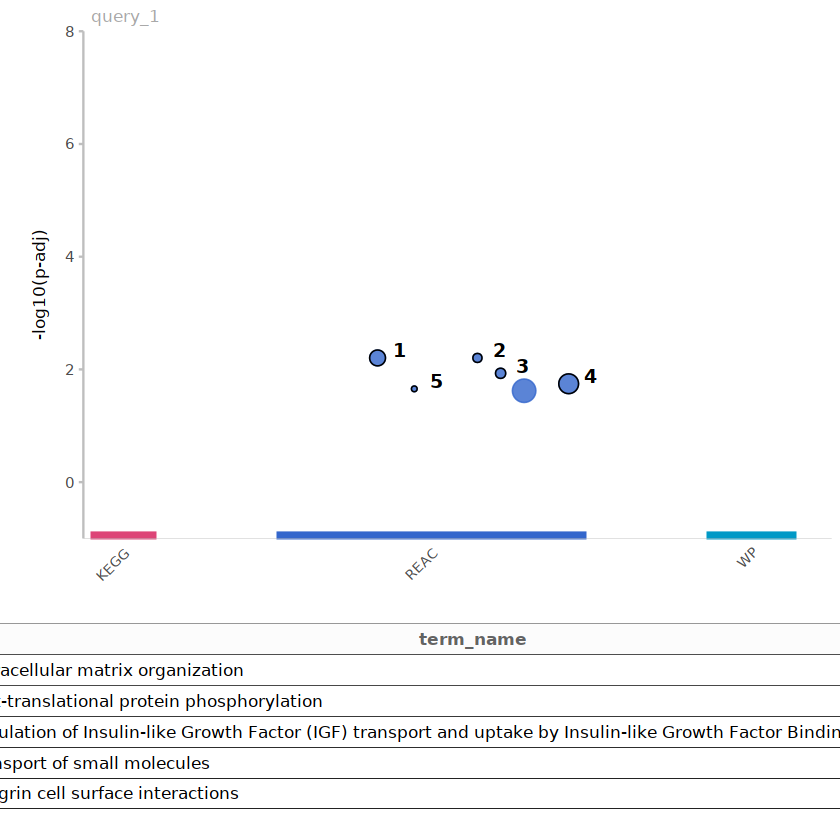

In [19]:
gGProfiler2OrganismName = "hsapiens"
tmp.de.list <- topTable_PedAMLvsAdultAML_Prog[topTable_PedAMLvsAdultAML_Prog$adj.P.Val < 0.05,]
runGProfiler2onGL(gl=tmp.de.list$SYMBOL, bkgd = topTable_PedAMLvsAdultAML_Prog, species=gGProfiler2OrganismName,
                  name = "DE_PedAMLvsAdultAML_Prog", outputDir = "../outputs/prog/rMATSv4.1_Prog_PedAMLvsAdultAML/")


In [29]:
gGProfiler2OrganismName = "hsapiens"
tmp.de.list <- topTable_PedAMLvsAdultAML_Stem[topTable_PedAMLvsAdultAML_Stem$adj.P.Val < 0.05,]
dim(tmp.de.list)
runGProfiler2onGL(gl=tmp.de.list$SYMBOL, bkgd = topTable_PedAMLvsAdultAML_Stem, species=gGProfiler2OrganismName,
                  name = "DE_PedAMLvsAdultAML_Stem", outputDir = "../outputs/stem/rMATSv4.1_Stem_PedAMLvsAdultAML/")


[1] 216  10

No results to show
Please make sure that the organism is correct or set significant = FALSE



[1] "runGProfiler2 failed for maxAdjPval <0.05 with message:Error in gostplot(gostres, capped = FALSE, interactive = FALSE): Name 'result' not found from the input\n"


In [26]:
crews.gl <- list(fig1G=c("PPAR2A", "ZNF551", "EGR1", "HLF", "FOSB", "TSC22D1", "ATF3", "JUN",
"FOSB", "ID1", "JUNB", "ETV3", "ZNF791", "ZNF821", "HOXA5", "NR4A1", "CEBPB", "NFIL3", "ID2", "IRF2"),
fig2E=c("RGS2", "RGS1", "NPY", "GNAI3", "TAC3", "PXN", "PTK2B", "GNG2", "WASF2", "OAZ2", "PIK3R4", "AHSP", "FTH1",
"HBA1", "CLC", "FHL3", "STAT3", "CSF3R", "BLOC1S1", "DTNBP1", "PTPN6", "PSMA1", "NAP1L1", "CORO1A", "RXRA", "LPIN2", 
"PPARG", "EBF1", "SPI1", "KLF6", "MAPK1", "ACTG1", "TMBIM6", "LMAN1", "CANX", "S100A10", "PPP2R1A", "PLG", "TRAF6", 
"CDH1", "ARRB2", "CD44", "EWSR1", "ING3", "EP300", "FOXA1", "SELENBP1", "CARD6", "MACF1", "GOLGA4", "ZFP36L2", 
"IFITM2", "FGR1", "TMEM106C", "E2F1", "RBM28", "NHP2L1", "EIF3A", "RPS3", "RPS24", "RPL14", "SRP54", "DDX6", "RC3H1",
"CEP57", "EGR1", "ZFP36L2", "NFKB1"),
fig2B=c("PRPF6", "SF2B2", "ACIN1", "CCDC12", "TXNL4A", "HNRNPA3", "HNRNPA1", "HNRNPA1L2", "SNRPD2", "PRPF18", 
        "SNRNP40", "RBMX", "SRSF5", "SNRNP20", "NHP2L1", "SNRPD1", "SF3B5", "RBM22", "RBM8A", "EIF4A3", 
        "BCAS2", "SRSF2", "SRSF3", "CTNNBL1", "SRSF7", "MAGOH", "DDX5", "SRSF6"))

In [29]:
head(ENS2EG2SYM)
head(topTable_PedAMLvsAdultAML_Prog)
t <- "SYMBOL"
#table(topTable_PedAMLvsAdultAML_Prog$SYMBOL %in% unique(crews.gl[[1]]))
table(topTable_PedAMLvsAdultAML_Prog[["SYMBOL"]] %in% unique(crews.gl[[1]]))
table(topTable_PedAMLvsAdultAML_Prog[[t]] %in% unique(crews.gl[[1]]))
length(topTable_PedAMLvsAdultAML_Prog[["p"]])
length(topTable_PedAMLvsAdultAML_Prog[[t]])

gene_id ens_id.gene_id ens_id.ensembl_id SYM     
1 1       1              ENSG00000121410   A1BG    
2 2       2              ENSG00000175899   A2M     
3 3       3              ENSG00000256069   A2MP1   
4 9       9              ENSG00000171428   NAT1    
5 10      10             ENSG00000156006   NAT2    
6 12      12             ENSG00000196136   SERPINA3

ENSEMBL         ENTREZID SYMBOL  gene_type      logFC    
ENSG00000081985 ENSG00000081985 3595     IL12RB2 protein_coding -8.063473
ENSG00000196368 ENSG00000196368 55190    NUDT11  protein_coding -8.273425
ENSG00000114698 ENSG00000114698 57088    PLSCR4  protein_coding -7.906101
ENSG00000184860 ENSG00000184860 93517    SDR42E1 protein_coding -7.117186
ENSG00000170627 ENSG00000170627 121355   GTSF1   protein_coding  2.627996
ENSG00000145020 ENSG00000145020 275      AMT     protein_coding -1.897904
                AveExpr    t         P.Value      adj.P.Val    B       
ENSG00000081985 -0.3512706 -8.214333 1.186463e-07 0.0008834744 6.600955
ENSG00000196368 -1.9688847 -7.769619 2.698920e-07 0.0008834744 5.595205
ENSG00000114698 -2.4558464 -7.726281 2.928078e-07 0.0008834744 5.504919
ENSG00000184860 -2.9863669 -7.778346 2.655073e-07 0.0008834744 5.484254
ENSG00000170627  4.3052909  6.968224 1.268826e-06 0.0018484832 5.412543
ENSG00000145020  4.4067128 -6.923648 1.386433e-06 0.0018484832 5.331167


FALSE  TRUE 
12051    18 


FALSE  TRUE 
12051    18 

[1] 0

[1] 12069

In [30]:
hypergeom <- function(tt, path, class="SYMBOL", uni=NULL) {
    if(is.null(uni)) {
        tt.sig <- subset(tt, adj.P.Val < 0.05)
        if(nrow(tt.sig) == 0) {
            return(NA)
        } else if(length(tt[[class]]) == 0) {
            return("Incorrect class")
        } else {
            path <- path[path %in% tt[[class]]]
            tt.sig.path <- sum(tt.sig[[class]] %in% path)
            over <- tt.sig[[class]][tt.sig[[class]] %in% path]
        }
    } else {
        tt.sig <- tt
        path <- path[path %in% uni[[class]]]
        tt.sig.path <- sum(tt.sig[[class]] %in% path)
        tt <- uni
    }
    over <- tt.sig[[class]][tt.sig[[class]] %in% path]
    message(paste(tt.sig.path, length(path), nrow(tt), nrow(tt.sig), sep="\t"))
    sig <- (1 - phyper(tt.sig.path, length(path), (nrow(tt) - length(path)), nrow(tt.sig)))
    return(list(pval=sig, overlap=over))
}

In [109]:
nrow(subset(topTable_PedAMLvsAdultAML_Prog, adj.P.Val < 0.05)) == 0
nrow(subset(topTable_PedAMLvsAdultAML_Stem, adj.P.Val < 0.05)) == 0
nrow(subset(topTable_PedAMLvsPedNL_Prog, adj.P.Val < 0.05)) == 0
nrow(subset(topTable_PedAMLvsPedNL_Stem, adj.P.Val < 0.05)) == 0


dim(topTable_PedAMLvsAdultAML_Prog_uni)
head(topTable_PedAMLvsAdultAML_Prog_uni)
tmp.sig <- subset(topTable_PedAMLvsAdultAML_Prog, adj.P.Val < 0.05)
if(nrow(tmp.sig) == 0) { 
#if(nrow(tt.sig) == 0) {
       message(NA)
    } else if(length(topTable_PedAMLvsAdultAML_Prog[["SYMBOL"]]) == 0) {
       message("Incorrect class")
    } else {
        path <- crews.gl[[1]][crews.gl[[1]] %in% topTable_PedAMLvsAdultAML_Prog[["SYMBOL"]]]
        tmp.sig.path <- sum(tmp.sig[["SYMBOL"]] %in% path)
        message(nrow(tmp.sig.path))
    }
    length(topTable_PedAMLvsAdultAML_Prog[["SYMBOL"]])

[1] FALSE

[1] FALSE

[1] FALSE

[1] TRUE

[1] 158  10

ENSEMBL         ENTREZID SYMBOL gene_type      logFC     
ENSG00000141562 ENSG00000141562 26502    NARF   protein_coding -0.6562839
ENSG00000117868 ENSG00000117868 57488    ESYT2  protein_coding  0.9240856
ENSG00000137818 ENSG00000137818 6176     RPLP1  protein_coding  0.6042510
ENSG00000164307 ENSG00000164307 51752    ERAP1  protein_coding  0.7643585
ENSG00000198918 ENSG00000198918 6170     RPL39  protein_coding  0.6980071
ENSG00000119509 ENSG00000119509 27130    INVS   protein_coding  0.6032084
                AveExpr   t         P.Value     adj.P.Val  B        
ENSG00000141562  6.787199 -3.407956 0.002973014 0.05125901 -2.571494
ENSG00000117868  8.310220  3.364807 0.003276821 0.05419593 -2.695530
ENSG00000137818 10.057104  3.342479 0.003445808 0.05563670 -2.727232
ENSG00000164307  6.785649  3.342171 0.003448194 0.05563670 -2.727416
ENSG00000198918  7.600865  3.250073 0.004240844 0.06042827 -2.938955
ENSG00000119509  4.427010  3.085999 0.006116744 0.07235839 -3.071127

[1] 12069

In [127]:
unlist(lapply(crews.gl, function(x) hypergeom(topTable_PedAMLvsAdultAML_Prog, x)))
unlist(lapply(crews.gl, function(x) hypergeom(topTable_PedAMLvsPedNL_Prog, x)))
unlist(lapply(crews.gl, function(x) hypergeom(topTable_PedAMLvsAdultAML_Stem, x)))
unlist(lapply(crews.gl, function(x) hypergeom(topTable_PedAMLvsAdultAML_Prog_uni, x, uni=topTable_PedAMLvsAdultAML_Prog)))
unlist(lapply(crews.gl, function(x) hypergeom(topTable_PedAMLvsPedNL_Prog_uni, x, uni=topTable_PedAMLvsPedNL_Prog)))
unlist(lapply(crews.gl, function(x) hypergeom(topTable_PedAMLvsPedNL_Stem_uni, x, uni=topTable_PedAMLvsPedNL_Stem)))
unlist(lapply(crews.gl, function(x) hypergeom(topTable_PedAMLvsPedNL_uni, x, uni=topTable_PedAMLvsPedNL_Prog)))
              

1	19	12069	672
12	61	12069	672
1	24	12069	672


fig1G        fig2E        fig2B 
2.860598e-01 2.418455e-05 3.894420e-01

0	19	12069	167
3	61	12069	167
0	24	12069	167


fig1G      fig2E      fig2B 
0.23274790 0.01000742 0.28446930

1	19	11837	216
2	56	11837	216
0	24	11837	216


fig1G      fig2E      fig2B 
0.04623489 0.08222292 0.35752532

0	19	12069	158
3	61	12069	158
0	24	12069	158


fig1G       fig2E       fig2B 
0.221640731 0.008274494 0.271357364

0	19	12069	542
10	61	12069	542
1	24	12069	542


fig1G        fig2E        fig2B 
5.825875e-01 7.333273e-05 2.934508e-01

0	19	11837	95
0	56	11837	95
0	24	11837	95


fig1G     fig2E     fig2B 
0.1420592 0.3638414 0.1759980

1	19	12069	121
2	61	12069	121
0	24	12069	121


fig1G      fig2E      fig2B 
0.01524961 0.02321202 0.21499300

In [31]:
TabS3_vanGal_T_Pl <- read.csv(file="../../TableS3_vanGalenetal_Tumor_Prog_Like.csv", header=TRUE)
head(TabS3_vanGal_T_Pl)
TabS3_vanGal_T_Hl <- read.csv(file="../../TableS3_vanGalenetal_Tumor_HSC_Like.csv", header=TRUE)
TabS3_vanGal_T_HPl <- read.csv(file="../../TableS3_vanGalenetal_Tumor_HSC_Prog_Like.csv", header=TRUE)
TabS3_vanGal_N_H_P <- read.csv(file="../../TableS3_vanGalenetal_Normal_HSC_Prog.csv", header=TRUE)
TabS3_Crews_HSC <- read.csv(file="../../TableS3_Crews_HSCgenes.csv", header=TRUE)
TabS3_Crews_HPC <- read.csv(file="../../TableS3_Crews_HPCgenes.csv", header=TRUE)
dim(TabS3_vanGal_T_Pl)
dim(TabS3_vanGal_T_Hl)
dim(TabS3_vanGal_T_HPl)
dim(TabS3_vanGal_N_H_P)
dim(TabS3_Crews_HSC)
dim(TabS3_Crews_HPC)
NewGL <- list(TabS3_vanGal_T_Pl=TabS3_vanGal_T_Pl[,1],
             TabS3_vanGal_T_Hl=TabS3_vanGal_T_Hl[,1],
             TabS3_vanGal_T_HPl=TabS3_vanGal_T_HPl[,1],
             TabS3_vanGal_N_H_P=TabS3_vanGal_N_H_P[,1], 
             TabS3_Crews_HSC=TabS3_Crews_HSC[,1],
             TabS3_Crews_HPC=TabS3_Crews_HPC[,1])

Tumor_Prog.like
1 CDK6           
2 HSP90AB1       
3 SPINK2         
4 EEF1B2         
5 PCNP           
6 TAPT1-AS1

[1] 50  1

[1] 50  1

[1] 50  1

[1] 50  1

[1] 127   1

[1] 236   1

In [39]:
dim(topTable_PedAMLvsPedNL_uni)
head(topTable_PedAMLvsPedNL_uni)

[1] 121  10

ENSEMBL         ENTREZID SYMBOL gene_type      logFC     
ENSG00000143995 ENSG00000143995 4211     MEIS1  protein_coding -4.0615334
ENSG00000066336 ENSG00000066336 6688     SPI1   protein_coding  0.7495652
ENSG00000166086 ENSG00000166086 83700    JAM3   protein_coding -2.4004195
ENSG00000089639 ENSG00000089639 51291    GMIP   protein_coding  0.5147122
ENSG00000099204 ENSG00000099204 3983     ABLIM1 protein_coding -1.7091338
ENSG00000253293 ENSG00000253293 3206     HOXA10 protein_coding -2.9822918
                AveExpr  t         P.Value     adj.P.Val B        
ENSG00000143995 4.374156 -3.204912 0.005613644 0.9981072 -4.526784
ENSG00000066336 7.053395  1.963239 0.067536095 0.9981072 -4.526909
ENSG00000166086 3.134164 -3.053661 0.007693150 0.9981072 -4.555214
ENSG00000089639 6.270479  1.634641 0.121960027 0.9981072 -4.557031
ENSG00000099204 5.252973 -1.820588 0.087732746 0.9981072 -4.557635
ENSG00000253293 3.322681 -2.464562 0.025630669 0.9981072 -4.567015

In [40]:
lapply(NewGL, function(x) x[x %in% topTable_PedAMLvsAdultAML_Prog$SYMBOL[topTable_PedAMLvsAdultAML_Prog$adj.P.Val < 0.05]])
lapply(NewGL, function(x) x[x %in% topTable_PedAMLvsPedNL_Prog$SYMBOL[topTable_PedAMLvsPedNL_Prog$adj.P.Val < 0.05]])
lapply(NewGL, function(x) x[x %in% topTable_PedAMLvsAdultAML_Stem$SYMBOL[topTable_PedAMLvsAdultAML_Stem$adj.P.Val < 0.05]])
lapply(NewGL, function(x) x[x %in% topTable_PedAMLvsPedNL_Stem$SYMBOL[topTable_PedAMLvsPedNL_Stem$adj.P.Val < 0.05]])
       
lapply(NewGL, function(x) x[x %in% topTable_PedAMLvsAdultAML_Prog_uni$SYMBOL[topTable_PedAMLvsAdultAML_Prog_uni$adj.P.Val < 0.05]])
lapply(NewGL, function(x) x[x %in% topTable_PedAMLvsPedNL_Prog_uni$SYMBOL[topTable_PedAMLvsPedNL_Prog_uni$adj.P.Val < 0.05]])
lapply(NewGL, function(x) x[x %in% topTable_PedAMLvsPedNL_Stem_uni$SYMBOL[topTable_PedAMLvsPedNL_Stem_uni$adj.P.Val < 0.05]])
lapply(NewGL, function(x) x[x %in% topTable_PedAMLvsPedNL_uni$SYMBOL[topTable_PedAMLvsPedNL_uni$adj.P.Val < 0.05]])
    

$TabS3_vanGal_T_Pl
[1] PARP1   EGFL7   SELENOP CCDC152 GNPTAB 
50 Levels: ATP5G2 B4GALT6 CCDC152 CDK6 CPA3 CTSC DSE EBPL EEF1A1 ... TPM4

$TabS3_vanGal_T_Hl
[1] MEIS1     CRHBP     HIST1H2BK MECOM     PLCB4     MPPED2   
50 Levels: ABCA9 ABCB1 C20orf203 CACNB4 CALCRL CCDC144NL-AS1 CCDC18-AS1 ... ZPBP

$TabS3_vanGal_T_HPl
[1] CD34    SELENOP MECOM  
50 Levels: ABCC1 ADGRG6 ANGPT1 CD200 CD34 CEP70 DAPK1 DSE EEF1A1 ... XIRP2

$TabS3_vanGal_N_H_P
[1] MEIS1  HLF    CRHBP  COMMD6 PCDH9  PRKG2  MYCT1  CD34   PBX1  
50 Levels: ADGRG6 ANGPT1 AVP C6orf48 CD34 CEP70 COMMD6 CRHBP EEF1A1 ... ZFAS1

$TabS3_Crews_HSC
[1] CRHBP TTC12 HLF   PTPRD CLC  
127 Levels: ABI3BP AC004463.6 AC009120.3 AC011043.1 AC034220.3 ... ZNF551

$TabS3_Crews_HPC
[1] RGS16     HIST1H2AC AKR1C1    C3orf14  
236 Levels: AC006129.1 AC010441.1 AC011043.1 AC116366.6 AHCTF1 ... ZNF821

$TabS3_vanGal_T_Pl
[1] NAP1L1
50 Levels: ATP5G2 B4GALT6 CCDC152 CDK6 CPA3 CTSC DSE EBPL EEF1A1 ... TPM4

$TabS3_vanGal_T_Hl
factor(0)
50 Levels: ABCA9 ABCB1 C20orf203 CACNB4 CALCRL CCDC144NL-AS1 CCDC18-AS1 ... ZPBP

$TabS3_vanGal_T_HPl
factor(0)
50 Levels: ABCC1 ADGRG6 ANGPT1 CD200 CD34 CEP70 DAPK1 DSE EEF1A1 ... XIRP2

$TabS3_vanGal_N_H_P
[1] COMMD6 FAU   
50 Levels: ADGRG6 ANGPT1 AVP C6orf48 CD34 CEP70 COMMD6 CRHBP EEF1A1 ... ZFAS1

$TabS3_Crews_HSC
factor(0)
127 Levels: ABI3BP AC004463.6 AC009120.3 AC011043.1 AC034220.3 ... ZNF551

$TabS3_Crews_HPC
[1] RGS16
236 Levels: AC006129.1 AC010441.1 AC011043.1 AC116366.6 AHCTF1 ... ZNF821

$TabS3_vanGal_T_Pl
[1] SELENOP CCDC152
50 Levels: ATP5G2 B4GALT6 CCDC152 CDK6 CPA3 CTSC DSE EBPL EEF1A1 ... TPM4

$TabS3_vanGal_T_Hl
[1] MEIS1  CALCRL CRHBP  XIRP2  PLCB4  MPPED2
50 Levels: ABCA9 ABCB1 C20orf203 CACNB4 CALCRL CCDC144NL-AS1 CCDC18-AS1 ... ZPBP

$TabS3_vanGal_T_HPl
[1] SELENOP ADGRG6  XIRP2  
50 Levels: ABCC1 ADGRG6 ANGPT1 CD200 CD34 CEP70 DAPK1 DSE EEF1A1 ... XIRP2

$TabS3_vanGal_N_H_P
 [1] MEIS1  HLF    CRHBP  MSRB3  PCDH9  ADGRG6 PREX2  MYCT1  AVP    PBX1  
50 Levels: ADGRG6 ANGPT1 AVP C6orf48 CD34 CEP70 COMMD6 CRHBP EEF1A1 ... ZFAS1

$TabS3_Crews_HSC
[1] CRHBP  ABI3BP TCEAL2 RIC3   LZTS3  HLF    PREX2  NOTCH4
127 Levels: ABI3BP AC004463.6 AC009120.3 AC011043.1 AC034220.3 ... ZNF551

$TabS3_Crews_HPC
[1] FAM124B C3orf14
236 Levels: AC006129.1 AC010441.1 AC011043.1 AC116366.6 AHCTF1 ... ZNF821

$TabS3_vanGal_T_Pl
factor(0)
50 Levels: ATP5G2 B4GALT6 CCDC152 CDK6 CPA3 CTSC DSE EBPL EEF1A1 ... TPM4

$TabS3_vanGal_T_Hl
factor(0)
50 Levels: ABCA9 ABCB1 C20orf203 CACNB4 CALCRL CCDC144NL-AS1 CCDC18-AS1 ... ZPBP

$TabS3_vanGal_T_HPl
factor(0)
50 Levels: ABCC1 ADGRG6 ANGPT1 CD200 CD34 CEP70 DAPK1 DSE EEF1A1 ... XIRP2

$TabS3_vanGal_N_H_P
factor(0)
50 Levels: ADGRG6 ANGPT1 AVP C6orf48 CD34 CEP70 COMMD6 CRHBP EEF1A1 ... ZFAS1

$TabS3_Crews_HSC
factor(0)
127 Levels: ABI3BP AC004463.6 AC009120.3 AC011043.1 AC034220.3 ... ZNF551

$TabS3_Crews_HPC
factor(0)
236 Levels: AC006129.1 AC010441.1 AC011043.1 AC116366.6 AHCTF1 ... ZNF821

$TabS3_vanGal_T_Pl
factor(0)
50 Levels: ATP5G2 B4GALT6 CCDC152 CDK6 CPA3 CTSC DSE EBPL EEF1A1 ... TPM4

$TabS3_vanGal_T_Hl
factor(0)
50 Levels: ABCA9 ABCB1 C20orf203 CACNB4 CALCRL CCDC144NL-AS1 CCDC18-AS1 ... ZPBP

$TabS3_vanGal_T_HPl
factor(0)
50 Levels: ABCC1 ADGRG6 ANGPT1 CD200 CD34 CEP70 DAPK1 DSE EEF1A1 ... XIRP2

$TabS3_vanGal_N_H_P
factor(0)
50 Levels: ADGRG6 ANGPT1 AVP C6orf48 CD34 CEP70 COMMD6 CRHBP EEF1A1 ... ZFAS1

$TabS3_Crews_HSC
factor(0)
127 Levels: ABI3BP AC004463.6 AC009120.3 AC011043.1 AC034220.3 ... ZNF551

$TabS3_Crews_HPC
factor(0)
236 Levels: AC006129.1 AC010441.1 AC011043.1 AC116366.6 AHCTF1 ... ZNF821

$TabS3_vanGal_T_Pl
factor(0)
50 Levels: ATP5G2 B4GALT6 CCDC152 CDK6 CPA3 CTSC DSE EBPL EEF1A1 ... TPM4

$TabS3_vanGal_T_Hl
factor(0)
50 Levels: ABCA9 ABCB1 C20orf203 CACNB4 CALCRL CCDC144NL-AS1 CCDC18-AS1 ... ZPBP

$TabS3_vanGal_T_HPl
factor(0)
50 Levels: ABCC1 ADGRG6 ANGPT1 CD200 CD34 CEP70 DAPK1 DSE EEF1A1 ... XIRP2

$TabS3_vanGal_N_H_P
factor(0)
50 Levels: ADGRG6 ANGPT1 AVP C6orf48 CD34 CEP70 COMMD6 CRHBP EEF1A1 ... ZFAS1

$TabS3_Crews_HSC
factor(0)
127 Levels: ABI3BP AC004463.6 AC009120.3 AC011043.1 AC034220.3 ... ZNF551

$TabS3_Crews_HPC
factor(0)
236 Levels: AC006129.1 AC010441.1 AC011043.1 AC116366.6 AHCTF1 ... ZNF821

$TabS3_vanGal_T_Pl
factor(0)
50 Levels: ATP5G2 B4GALT6 CCDC152 CDK6 CPA3 CTSC DSE EBPL EEF1A1 ... TPM4

$TabS3_vanGal_T_Hl
factor(0)
50 Levels: ABCA9 ABCB1 C20orf203 CACNB4 CALCRL CCDC144NL-AS1 CCDC18-AS1 ... ZPBP

$TabS3_vanGal_T_HPl
factor(0)
50 Levels: ABCC1 ADGRG6 ANGPT1 CD200 CD34 CEP70 DAPK1 DSE EEF1A1 ... XIRP2

$TabS3_vanGal_N_H_P
factor(0)
50 Levels: ADGRG6 ANGPT1 AVP C6orf48 CD34 CEP70 COMMD6 CRHBP EEF1A1 ... ZFAS1

$TabS3_Crews_HSC
factor(0)
127 Levels: ABI3BP AC004463.6 AC009120.3 AC011043.1 AC034220.3 ... ZNF551

$TabS3_Crews_HPC
factor(0)
236 Levels: AC006129.1 AC010441.1 AC011043.1 AC116366.6 AHCTF1 ... ZNF821

$TabS3_vanGal_T_Pl
factor(0)
50 Levels: ATP5G2 B4GALT6 CCDC152 CDK6 CPA3 CTSC DSE EBPL EEF1A1 ... TPM4

$TabS3_vanGal_T_Hl
factor(0)
50 Levels: ABCA9 ABCB1 C20orf203 CACNB4 CALCRL CCDC144NL-AS1 CCDC18-AS1 ... ZPBP

$TabS3_vanGal_T_HPl
factor(0)
50 Levels: ABCC1 ADGRG6 ANGPT1 CD200 CD34 CEP70 DAPK1 DSE EEF1A1 ... XIRP2

$TabS3_vanGal_N_H_P
factor(0)
50 Levels: ADGRG6 ANGPT1 AVP C6orf48 CD34 CEP70 COMMD6 CRHBP EEF1A1 ... ZFAS1

$TabS3_Crews_HSC
factor(0)
127 Levels: ABI3BP AC004463.6 AC009120.3 AC011043.1 AC034220.3 ... ZNF551

$TabS3_Crews_HPC
factor(0)
236 Levels: AC006129.1 AC010441.1 AC011043.1 AC116366.6 AHCTF1 ... ZNF821

In [97]:
unlist(lapply(NewGL, function(x) hypergeom(topTable_PedAMLvsAdultAML_Prog, x)))
unlist(lapply(NewGL, function(x) hypergeom(topTable_PedAMLvsPedNL_Prog, x)))
unlist(lapply(NewGL, function(x) hypergeom(topTable_PedAMLvsAdultAML_Stem, x)))
unlist(lapply(NewGL, function(x) hypergeom(topTable_PedAMLvsAdultAML_Prog_uni, x, uni=topTable_PedAMLvsAdultAML_Prog)))
unlist(lapply(NewGL, function(x) hypergeom(topTable_PedAMLvsPedNL_Prog_uni, x, uni=topTable_PedAMLvsPedNL_Prog)))
unlist(lapply(NewGL, function(x) hypergeom(topTable_PedAMLvsPedNL_Stem_uni, x, uni=topTable_PedAMLvsPedNL_Stem)))
unlist(lapply(NewGL, function(x) hypergeom(topTable_PedAMLvsPedNL_uni, x, uni=topTable_PedAMLvsPedNL_Prog)))


5	43	12069	672
6	32	12069	672
3	44	12069	672
9	42	12069	672
5	78	12069	672
4	125	12069	672


TabS3_vanGal_T_Pl  TabS3_vanGal_T_Hl TabS3_vanGal_T_HPl TabS3_vanGal_N_H_P 
      3.066697e-02       1.594108e-03       2.280844e-01       7.765174e-05 
   TabS3_Crews_HSC    TabS3_Crews_HPC 
      2.668727e-01       8.325400e-01

1	43	12069	167
0	32	12069	167
0	44	12069	167
2	42	12069	167
0	78	12069	167
1	125	12069	167


TabS3_vanGal_T_Pl  TabS3_vanGal_T_Hl TabS3_vanGal_T_HPl TabS3_vanGal_N_H_P 
        0.11907208         0.36010870         0.45891913         0.02013392 
   TabS3_Crews_HSC    TabS3_Crews_HPC 
        0.66389686         0.51861390

2	43	11837	216
6	35	11837	216
3	44	11837	216
10	42	11837	216
8	81	11837	216
2	121	11837	216


TabS3_vanGal_T_Pl  TabS3_vanGal_T_Hl TabS3_vanGal_T_HPl TabS3_vanGal_N_H_P 
      4.335454e-02       2.662452e-06       8.273054e-03       1.509752e-10 
   TabS3_Crews_HSC    TabS3_Crews_HPC 
      1.587085e-05       3.801994e-01

1	43	12069	158
0	32	12069	158
0	44	12069	158
1	42	12069	158
0	78	12069	158
0	125	12069	158


TabS3_vanGal_T_Pl  TabS3_vanGal_T_Hl TabS3_vanGal_T_HPl TabS3_vanGal_N_H_P 
         0.1086596          0.3444213          0.4405870          0.1044677 
   TabS3_Crews_HSC    TabS3_Crews_HPC 
         0.6434163          0.8090622

3	43	12069	542
2	32	12069	542
2	44	12069	542
2	42	12069	542
3	78	12069	542
2	125	12069	542


TabS3_vanGal_T_Pl  TabS3_vanGal_T_Hl TabS3_vanGal_T_HPl TabS3_vanGal_N_H_P 
         0.1259616          0.1720633          0.3165856          0.2917024 
   TabS3_Crews_HSC    TabS3_Crews_HPC 
         0.4667969          0.9241239

0	43	11837	95
2	35	11837	95
2	44	11837	95
4	42	11837	95
6	81	11837	95
1	121	11837	95


TabS3_vanGal_T_Pl  TabS3_vanGal_T_Hl TabS3_vanGal_T_HPl TabS3_vanGal_N_H_P 
      2.932762e-01       2.721308e-03       5.227652e-03       2.014238e-05 
   TabS3_Crews_HSC    TabS3_Crews_HPC 
      3.676991e-06       2.534952e-01

2	43	12069	121
4	32	12069	121
1	44	12069	121
6	42	12069	121
2	78	12069	121
1	125	12069	121


TabS3_vanGal_T_Pl  TabS3_vanGal_T_Hl TabS3_vanGal_T_HPl TabS3_vanGal_N_H_P 
      9.060878e-03       1.511672e-05       7.180790e-02       1.724708e-07 
   TabS3_Crews_HSC    TabS3_Crews_HPC 
      4.345870e-02       3.574231e-01

In [44]:
Holm.gl <- c("DPPA4", "DPPA2", "CCNK", "POU5F1", "NANOG", "CD44", "FGF2", "IGF1R", "KIT", "FGF5", "EGFR", "DNMT3A",
            "DNMT3B", "EGR1", "KLF4", "HDAC1", "EP300", "FOXA1", "SOX2", "SALL2", "FOXP1", "ID2", "ID3", "PRDM14",
            "TCF3", "PSIP1", "MBNL1", "MBNL3", "HNRNPAB", "E2F1", "KLF5", "PRMT5", "MSI1", "MSI2", "PABPC1", "SART3",
            "HNRNPK", "AQR", "MAGOH", "TRA2B", "FUBP1", "SRPK1", "PTBP1", "HNRNPD", "SNRPF", "SRRM1", "HNRNPA1", "KHDRBS1",
            "HNRNPA2B1", "SRSF11", "GTF2F2", "SRSF1", "SFPQ", "TIA1", "ESRRB", "PRPF40A", "HNRNPL", "RBM26", "CPSF6")
table(Holm.gl %in% ENS2EG2SYM$SYM)


TRUE 
  59 

character(0)

In [45]:
hypergeom(topTable_PedAMLvsAdultAML_Prog, Holm.gl)
hypergeom(topTable_PedAMLvsPedNL_Prog, Holm.gl)
hypergeom(topTable_PedAMLvsAdultAML_Stem, Holm.gl)
hypergeom(topTable_PedAMLvsAdultAML_Prog_uni, Holm.gl, uni=topTable_PedAMLvsAdultAML_Prog)
hypergeom(topTable_PedAMLvsPedNL_Prog_uni, Holm.gl, uni=topTable_PedAMLvsPedNL_Prog)
hypergeom(topTable_PedAMLvsPedNL_Stem_uni, Holm.gl, uni=topTable_PedAMLvsPedNL_Stem)
hypergeom(topTable_PedAMLvsPedNL_uni, Holm.gl, uni=topTable_PedAMLvsPedNL_Prog)

3	47	12069	672


$pval
[1] 0.2650037

$overlap
[1] "DPPA4"  "CD44"   "DNMT3B"

1	47	12069	167


$pval
[1] 0.1376611

$overlap
[1] "SRSF11"

1	47	11837	216


$pval
[1] 0.2114545

$overlap
[1] "DPPA4"

1	47	12069	158


$pval
[1] 0.1258505

$overlap
[1] "SRSF11"

2	47	12069	542


$pval
[1] 0.3539406

$overlap
[1] "CD44"   "DNMT3B"

0	47	11837	95


$pval
[1] 0.3157758

$overlap
character(0)

1	47	12069	121


$pval
[1] 0.08050198

$overlap
[1] "DPPA4"

[Table of Contents](#Table-of-Contents)
## Understanding the Output
The following section explains the columns in each output file. It also provides some links to user guides.

### WebGestalt

Webgestalt output is labeled with the method applied (ORA or GSEA) and the functional database searched (typically geneontology_Biological_Process, geneontology_Molecular_Function, etc.). Within each results folder, look for the "Report....html" file. 

Further information is available in the [WebGestalt user manual](http://www.webgestalt.org/WebGestalt_2019_Manual.pdf) .

### Pathview
Images of KEGG pathway(s) with gene expression (logFC) color coded. The scale (-1 to 1) is a pseudo-scale and doesn't actually represent the raw logFC value.

### SPIA

Column definitions

* pSize: the number of genes on the pathway
* NDE: the number of DE genes per pathway
* tA: observed total perturbation accumulation in the pathway
* pNDE: the probabilirty to observe at least NDE genes on the pathway using a hypergeometric model
* pPERT: the probability to observe a total accumulation more extreme than tA only by chance
* pG: the p-value obtained by combining pNDE and pPERT
* pGFdr: the False Discovery Rate 
* pGFWER: Bonferroni adjusted global p-values
* Status: the direction in which the pathway is perturbed (activated or inhibited)
* KEGGLINK: URL to the KEGG website that displays the pathway image with the differentially expressed genes highlighted

(Descriptions above are from p.6 of the [SPIA user manual](http://bioconductor.org/packages/release/bioc/manuals/SPIA/man/SPIA.pdf).)

### GSVA
GSVA results show enriched gene set names from MSigDB. The gene sets can be searched in Pubmed and/or Google to find the associated publication. Typically, the gene sets begin with the last name of the first author of the publication.

Column definitions

* logFC: the log2 fold change of the gene set 
* AveExpr: in logCPM
* t: t-statistic
* P.Value: self explanatory
* adj.P.Val: Benjamini-Hochberg adjusted p-value
* B: B-statistic

[Table of Contents](#Table-of-Contents)

Save the workspace objects for future reference:

In [ ]:
writeWorkspaceImage(gInterimDir, gRunName)

[Table of Contents](#Table-of-Contents)

## Summary

<div class="alert alert-warning">
    <strong>Analyst Note: Fill In</strong><br />
    
Replace this cell with a summary of key points from this notebook in this section. This summary should highlight important findings and draw conclusions for the researcher. 

</div>

[Table of Contents](#Table-of-Contents)

## Citations

1. Law CW, Alhamdoosh M, Su S, Smyth GK, Ritchie ME. RNA-seq analysis is easy as 1-2-3 with limma, Glimma and edgeR. Version 2. F1000Res. 2016 Jun 17 [revised 2016 Jan 1];5:1408.
2. Wang J, Vasaikar S, Shi Z, Greer M, Zhang B. WebGestalt 2017: a more comprehensive, powerful, flexible and interactive gene set enrichment analysis toolkit. Nucleic Acids Res. 2017 Jul 3;45(W1):W130-W137.
3. R Core Team (2016). R: A language and environment for statistical computing. R Foundation for Statistical Computing, Vienna, Austria. URL https://www.R-project.org/.
4. Luo, Weijun, Brouwer, Cory (2013). Pathview: an R/Bioconductor package for pathway-based data integration and visualization. Bioinformatics, 29(14), 1830-1831. doi: 10.1093/bioinformatics/btt285.
5. Huber W, Carey VJ, Gentleman R, Anders S, Carlson M, Carvalho BS, Bravo HC, Davis S, Gatto L, Girke T, Gottardo R, Hahne F, Hansen KD, Irizarry RA, Lawrence M, Love MI, MacDonald J, Obenchain V, Oleś AK, Pagès H, Reyes A, Shannon P, Smyth GK, Tenenbaum D, Waldron L, Morgan M. Orchestrating high-throughput genomic analysis with Bioconductor. Nat Methods. 2015 Feb;12(2):115-21.
6. Kanehisa M, Goto S, Kawashima S, Okuno Y, Hattori M. The KEGG resource for deciphering the genome. Nucleic Acids Res. 2004 Jan 1;32(Database issue):D277-80.
7. Ashburner M, Ball CA, Blake JA, Botstein D, Butler H, Cherry JM, Davis AP, Dolinski K, Dwight SS, Eppig JT, Harris MA, Hill DP, Issel-Tarver L, Kasarskis A, Lewis S, Matese JC, Richardson JE, Ringwald M, Rubin GM, Sherlock G. Gene ontology: tool for the unification of biology. The Gene Ontology Consortium. Nat Genet. 2000 May;25(1):25-9.
8. Subramanian A, Tamayo P, Mootha VK, Mukherjee S, Ebert BL, Gillette MA, Paulovich A, Pomeroy SL, Golub TR, Lander ES, Mesirov JP. Gene set enrichment analysis: a knowledge-based approach for interpreting genome-wide expression profiles. Proc Natl Acad Sci U S A. 2005 Oct 25;102(43):15545-50.
9. Tarca AL, Kathri P, Draghici S (2018). SPIA: Signaling Pathway Impact Analysis (SPIA) using combined evidence of pathway over-representation and unusual signaling perturbations. R package version 2.34.0, http://bioinformatics.oxfordjournals.org/cgi/reprint/btn577v1.
10. Hänzelmann S., Castelo R. and Guinney J. GSVA: gene set variation analysis for microarray and RNA-Seq data. BMC Bioinformatics, 14:7, 2013.

[Table of Contents](#Table-of-Contents)

## Appendix: R Session Info

In [ ]:
sessionInfo()

[Table of Contents](#Table-of-Contents)

Copyright (c) 2018 UC San Diego Center for Computational Biology & Bioinformatics under the MIT License

Notebook template by Amanda Birmingham